### <center>Gradient Descent & Stochastic Gradient Descent in Jupyter</center>
## <center>Non-linear Optimization: Group Project</center>
<center>ePGD ABA 2020-21</center>

**Module taught by Professor Ankur Sinha \
Module co-ordinated by Sathish LM and Vaarisha Gogdani**

**CAUTION - This notebook takes approximately 75 minutes to complete execution**

**Group-2 includes : Kanika Gupta, Hemali Sharma, Bhushan Makim, Jaydip Biniwale, Vinay Dalal and Arimitra Maiti**

In [1]:
from datetime import datetime
start = datetime.now()
print("now =", start)

now = 2021-01-26 18:49:52.672311


In [2]:
##Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

In [3]:
##Import data
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/Classification/bank-term-deposit-subscription.csv"
dataset = pd.read_csv(url, error_bad_lines = False, header=0, index_col=None)
dataset.head(4)

,age,occupation,maritalStatus,education,creditDefault,housingLoan,personalLoan,contactMode,month,dayOfWeek,duration,campaign,pdays,previous,poutcome,subscribed
0,54,housemaid,married,basic.9y,no,no,no,cellular,nov,wed,362,3,999,0,nonexistent,no
1,62,technician,married,unknown,no,no,no,cellular,mar,mon,105,2,999,0,nonexistent,no
2,58,unemployed,divorced,high.school,no,no,no,cellular,jul,mon,377,4,999,0,nonexistent,no
3,25,admin.,single,university.degree,no,yes,no,cellular,jul,thu,174,2,999,0,nonexistent,no


In [4]:
##Check for missing values in the dataset
dataset.isnull().sum()/dataset.shape[0] * 100

age              0.0
occupation       0.0
maritalStatus    0.0
education        0.0
creditDefault    0.0
housingLoan      0.0
personalLoan     0.0
contactMode      0.0
month            0.0
dayOfWeek        0.0
duration         0.0
campaign         0.0
pdays            0.0
previous         0.0
poutcome         0.0
subscribed       0.0
dtype: float64

In [5]:
##Check absolute imbalance
dataset.subscribed.value_counts().sort_index()

no     2742
yes     348
Name: subscribed, dtype: int64

In [6]:
##Transform order column to change text categories into ordered values
previous_mapping = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five"}
dataset["previous_"] = dataset.previous.map(previous_mapping)

In [7]:
##Change class encoding from no:yes to 0:1
customer_mapping = {"no":0, "yes":1}
dataset["target"] = dataset.subscribed.map(customer_mapping)

In [8]:
##Drop unused columns
dataset.drop(["subscribed", "previous"], axis=1, inplace=True)

In [9]:
##Import split module
from sklearn.model_selection import train_test_split

In [10]:
##Divide total rows into 80:20 and keep the 20 for test
y = dataset.loc[:, ["target"]]
X = dataset.loc[:, ['age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
       'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek',
       'duration', 'campaign', 'pdays', 'previous_', 'poutcome']]

##Push 40% to test data
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

X_data.shape, X_test.shape, y_data.shape, y_test.shape

((2472, 15), (618, 15), (2472, 1), (618, 1))

In [11]:
##Further Divide total rows of the 80 above, into 80:20 and keep the 20 for validation
X = X_data.copy()
y = y_data.copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1977, 15), (495, 15), (1977, 1), (495, 1))

In [12]:
##Class imbalance proportion of train set
round((np.unique(y_train, return_counts=True)[1][1]/(np.unique(y_train, return_counts=True)[1][0]+np.unique(y_train, return_counts=True)[1][1]))*100,2)

11.23

In [13]:
##Class imbalance proportion of validation set
round((np.unique(y_valid, return_counts=True)[1][1]/(np.unique(y_valid, return_counts=True)[1][0]+np.unique(y_valid, return_counts=True)[1][1]))*100,2)

11.31

In [14]:
##Class imbalance proportion of test set
round((np.unique(y_test, return_counts=True)[1][1]/(np.unique(y_test, return_counts=True)[1][0]+np.unique(y_test, return_counts=True)[1][1]))*100,2)

11.33

In [15]:
##Sum of train set and validation set must match the rows of initial split
(X_train.shape[0] + X_valid.shape[0]) == X_data.shape[0]

True

In [16]:
##Sum of all sets must match the rows of imported file
(X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]) == dataset.shape[0]

True

In [17]:
##Free up some memory
del X_data, y_data, X, y

In [18]:
# !pip install feature_engine
from sklearn.pipeline import Pipeline
from feature_engine.outlier_removers import Winsorizer
from feature_engine.discretisers import EqualWidthDiscretiser
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [19]:
##Create pipeline for operations where target labels are not required to create transformers
create_pipe = Pipeline([

    # Outlier handling for 'age', 'duration', 'campaign'
    ('windsoriser',
     Winsorizer(distribution='quantiles',
                          tail='both',
                          fold=0.05,
                          variables=['age', 'duration', 'campaign'])),
    
    # Make 10 bins of equal size for 'age', 'duration', 'campaign', 'pdays'
    ('equal_width_discretiser',
     EqualWidthDiscretiser(bins=10,
                      variables = ['age', 'duration', 'campaign', 'pdays'],
                      return_object=True)),
    
    # Rare label encoding for only object attributes
    ('rare_label_encoder',
     RareLabelCategoricalEncoder(tol=0.01, n_categories=2,
                                 variables=['age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                            'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek',
                                            'duration', 'campaign', 'pdays', 'previous_', 'poutcome']))

])

In [20]:
##Fit the transformer in trainset and apply to train, validation and test sets
create_pipe.fit(X_train)
X_train_pipe = create_pipe.transform(X_train)
X_valid_pipe = create_pipe.transform(X_valid)
X_test_pipe = create_pipe.transform(X_test)

C:\Users\sinaii\Anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable creditDefault is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
C:\Users\sinaii\Anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable contactMode is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
C:\Users\sinaii\Anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable pdays is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for

In [21]:
##Create transformer for Target mean encoding
ordered_label_encoder = OrdinalCategoricalEncoder(
    encoding_method='ordered',
    variables=['age', 'occupation', 'maritalStatus', 'education', 'creditDefault', 'housingLoan', 'personalLoan',
              'contactMode', 'month', 'dayOfWeek', 'duration', 'campaign', 'pdays', 'previous_', 'poutcome'])

In [22]:
##Fit the transformer in trainset for both predictors and target labels, this is outside the above pipeline
ordered_label_encoder.fit(X_train_pipe, y_train)

OrdinalCategoricalEncoder(variables=['age', 'occupation', 'maritalStatus',
                                     'education', 'creditDefault',
                                     'housingLoan', 'personalLoan',
                                     'contactMode', 'month', 'dayOfWeek',
                                     'duration', 'campaign', 'pdays',
                                     'previous_', 'poutcome'])

In [23]:
##Fit the transformer to train, validation and test sets
X_train1 = ordered_label_encoder.transform(X_train_pipe)
X_valid1 = ordered_label_encoder.transform(X_valid_pipe)
X_test1 = ordered_label_encoder.transform(X_test_pipe)

C:\Users\sinaii\Anaconda3\lib\site-packages\feature_engine\base_transformers.py:90: UserWarning: NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories does not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.
  warnings.warn(


In [24]:
##Single cell in test set is somehow giving NA value for education column
##Possible minor flaw in transformer, so explicitly filling one missing cell in test set
X_test1.education.fillna(method ='ffill', inplace = True)

In [25]:
##Import scaling module
from sklearn.preprocessing import MinMaxScaler

In [26]:
##Train the scaler in trainset
sc = MinMaxScaler()
sc.fit(X_train1)

MinMaxScaler()

In [27]:
##Fit the scaler to all sets
X_train_scaled = sc.transform(X_train1)
X_valid_scaled = sc.transform(X_valid1)
X_test_scaled = sc.transform(X_test1)

In [28]:
##Free some memory
del X_train_pipe, X_test_pipe, X_valid_pipe, X_train1, X_valid1, X_test1

In [29]:
##Import scoring module for binary classification
from sklearn.metrics import f1_score

In [30]:
##Add constant bias column (initial value) to all sets, similar to stats model-add constant 
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0])), X_train_scaled]
X_valid_scaled = np.c_[np.ones((X_valid_scaled.shape[0])), X_valid_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0])), X_test_scaled]

In [31]:
##Check shapes
X_train_scaled.shape, X_valid_scaled.shape, X_test_scaled.shape

((1977, 16), (495, 16), (618, 16))

**Gradient Descent Approach - Squared loss**

In [32]:
##Set seed to np.random
##Initialize random weight matrix with uniform distribution
np.random.seed(123)
WeightMatrix = np.random.uniform(size=(X_train_scaled.shape[1],))

In [33]:
##Check shape of initial weight matrix
WeightMatrix.shape

(16,)

In [34]:
##Create logistic sigmoid function based on which predictions would be made
##The dot product of input matrix and weight matrix would pass through the activation function
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

__Important cell for collating Gradient descent results__

In [35]:
np.arange(0.01,1,0.05)

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96])

In [36]:
def gradient_descent(lr):
    np.random.seed(123)
    WeightMatrix = np.random.uniform(size=(X_train_scaled.shape[1],))
    ##Create blank dataframes with column names for pd.concat at the end
    lossValues_df_all = pd.DataFrame(columns=['epochs', 'loss', 'learning_rate'])

    train_score_df_all = pd.DataFrame(columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])

    WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome'])
    ##For each value of eta (learning rate) we need to run certain epochs
    ##Each epoch would complete seeing 100% of train set one by one with one set of weights
    lossValues = []
    train_score = []
    WeightValues0 = []
    WeightValues1 = []
    for epoch in np.arange(0, 1000):
        learning_rate = lr
        preds = sigmoid_activation(X_train_scaled.dot(WeightMatrix))
        error = preds - y_train.values.flatten()
        label = [0 if i < 0.5 else 1 for i in preds]
        score_train = round(f1_score(y_train.values.flatten(), label),4)
        pred_valid = sigmoid_activation(X_valid_scaled.dot(WeightMatrix))
        label_valid = [0 if i < 0.5 else 1 for i in pred_valid]
        score_valid = round(f1_score(y_valid.values.flatten(), label_valid),4)
        score_list = [epoch+1, score_train, score_valid, learning_rate]
        train_score.append(score_list)
        loss = round(np.sum(error ** 2),2)
        loss_list = [epoch+1, loss, learning_rate]
        lossValues.append(loss_list)
        gradient = X_train_scaled.T.dot(error) / X_train_scaled.shape[0]
        W_list0 = epoch+1
        W_list1 = WeightMatrix
        WeightValues0.append(W_list0)
        WeightValues1.append(W_list1.copy())
        WeightMatrix += -learning_rate * gradient
        lossValues_df = pd.DataFrame(lossValues, columns=['epochs', 'loss', 'learning_rate'])
        train_score_df = pd.DataFrame(train_score, columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])
        WeightValues_df = pd.DataFrame(WeightValues1,
                           columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome'], 
                           index=[WeightValues0])
        WeightValues_df['learning_rate'] = learning_rate
    
    ##Append result of each eta and total number of epochs for plotting
    lossValues_df_all = pd.concat([lossValues_df_all, lossValues_df], ignore_index=True, axis=0)
    train_score_df_all = pd.concat([train_score_df_all, train_score_df], ignore_index=True, axis=0)
    WeightValues_df_all = pd.concat([WeightValues_df_all, WeightValues_df], ignore_index=False, axis=0)
    
    return lossValues_df_all, train_score_df_all, WeightValues_df_all

In [37]:
results = gradient_descent(0.01)
a0 = results[0]
b0 = results[1]
c0 = results[2]
del results

results = gradient_descent(0.06)
a1 = results[0]
b1 = results[1]
c1 = results[2]
del results

results = gradient_descent(0.11)
a2 = results[0]
b2 = results[1]
c2 = results[2]
del results

results = gradient_descent(0.16)
a3 = results[0]
b3 = results[1]
c3 = results[2]
del results

results = gradient_descent(0.21)
a4 = results[0]
b4 = results[1]
c4 = results[2]
del results

results = gradient_descent(0.26)
a5 = results[0]
b5 = results[1]
c5 = results[2]
del results

results = gradient_descent(0.31)
a6 = results[0]
b6 = results[1]
c6 = results[2]
del results

results = gradient_descent(0.36)
a7 = results[0]
b7 = results[1]
c7 = results[2]
del results

results = gradient_descent(0.41)
a8 = results[0]
b8 = results[1]
c8 = results[2]
del results

results = gradient_descent(0.46)
a9 = results[0]
b9 = results[1]
c9 = results[2]
del results

results = gradient_descent(0.51)
a10 = results[0]
b10 = results[1]
c10 = results[2]
del results

results = gradient_descent(0.56)
a11 = results[0]
b11 = results[1]
c11 = results[2]
del results

results = gradient_descent(0.61)
a12 = results[0]
b12 = results[1]
c12 = results[2]
del results

results = gradient_descent(0.66)
a13 = results[0]
b13 = results[1]
c13 = results[2]
del results

results = gradient_descent(0.71)
a14 = results[0]
b14 = results[1]
c14 = results[2]
del results

results = gradient_descent(0.76)
a15 = results[0]
b15 = results[1]
c15 = results[2]
del results

results = gradient_descent(0.81)
a16 = results[0]
b16 = results[1]
c16 = results[2]
del results

results = gradient_descent(0.86)
a17 = results[0]
b17 = results[1]
c17 = results[2]
del results

results = gradient_descent(0.91)
a18 = results[0]
b18 = results[1]
c18 = results[2]
del results

results = gradient_descent(0.96)
a19 = results[0]
b19 = results[1]
c19 = results[2]
del results

In [38]:
lossValues_df_all = pd.DataFrame(columns=['epochs', 'loss', 'learning_rate'])

In [39]:
lossValues_df_all = pd.concat([lossValues_df_all, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11,
                              a12, a13, a14, a15, a16, a17, a18, a19], ignore_index=True, axis=0)

In [40]:
train_score_df_all = pd.DataFrame(columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])

In [41]:
train_score_df_all = pd.concat([train_score_df_all, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11,
                              b12, b13, b14, b15, b16, b17, b18, b19], ignore_index=True, axis=0)

In [42]:
WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome', 'learning_rate'])

In [43]:
WeightValues_df_all = pd.concat([WeightValues_df_all, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,
                              c12, c13, c14, c15, c16, c17, c18, c19], ignore_index=True, axis=0)

In [44]:
del a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19

In [45]:
del b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19

In [46]:
del c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19

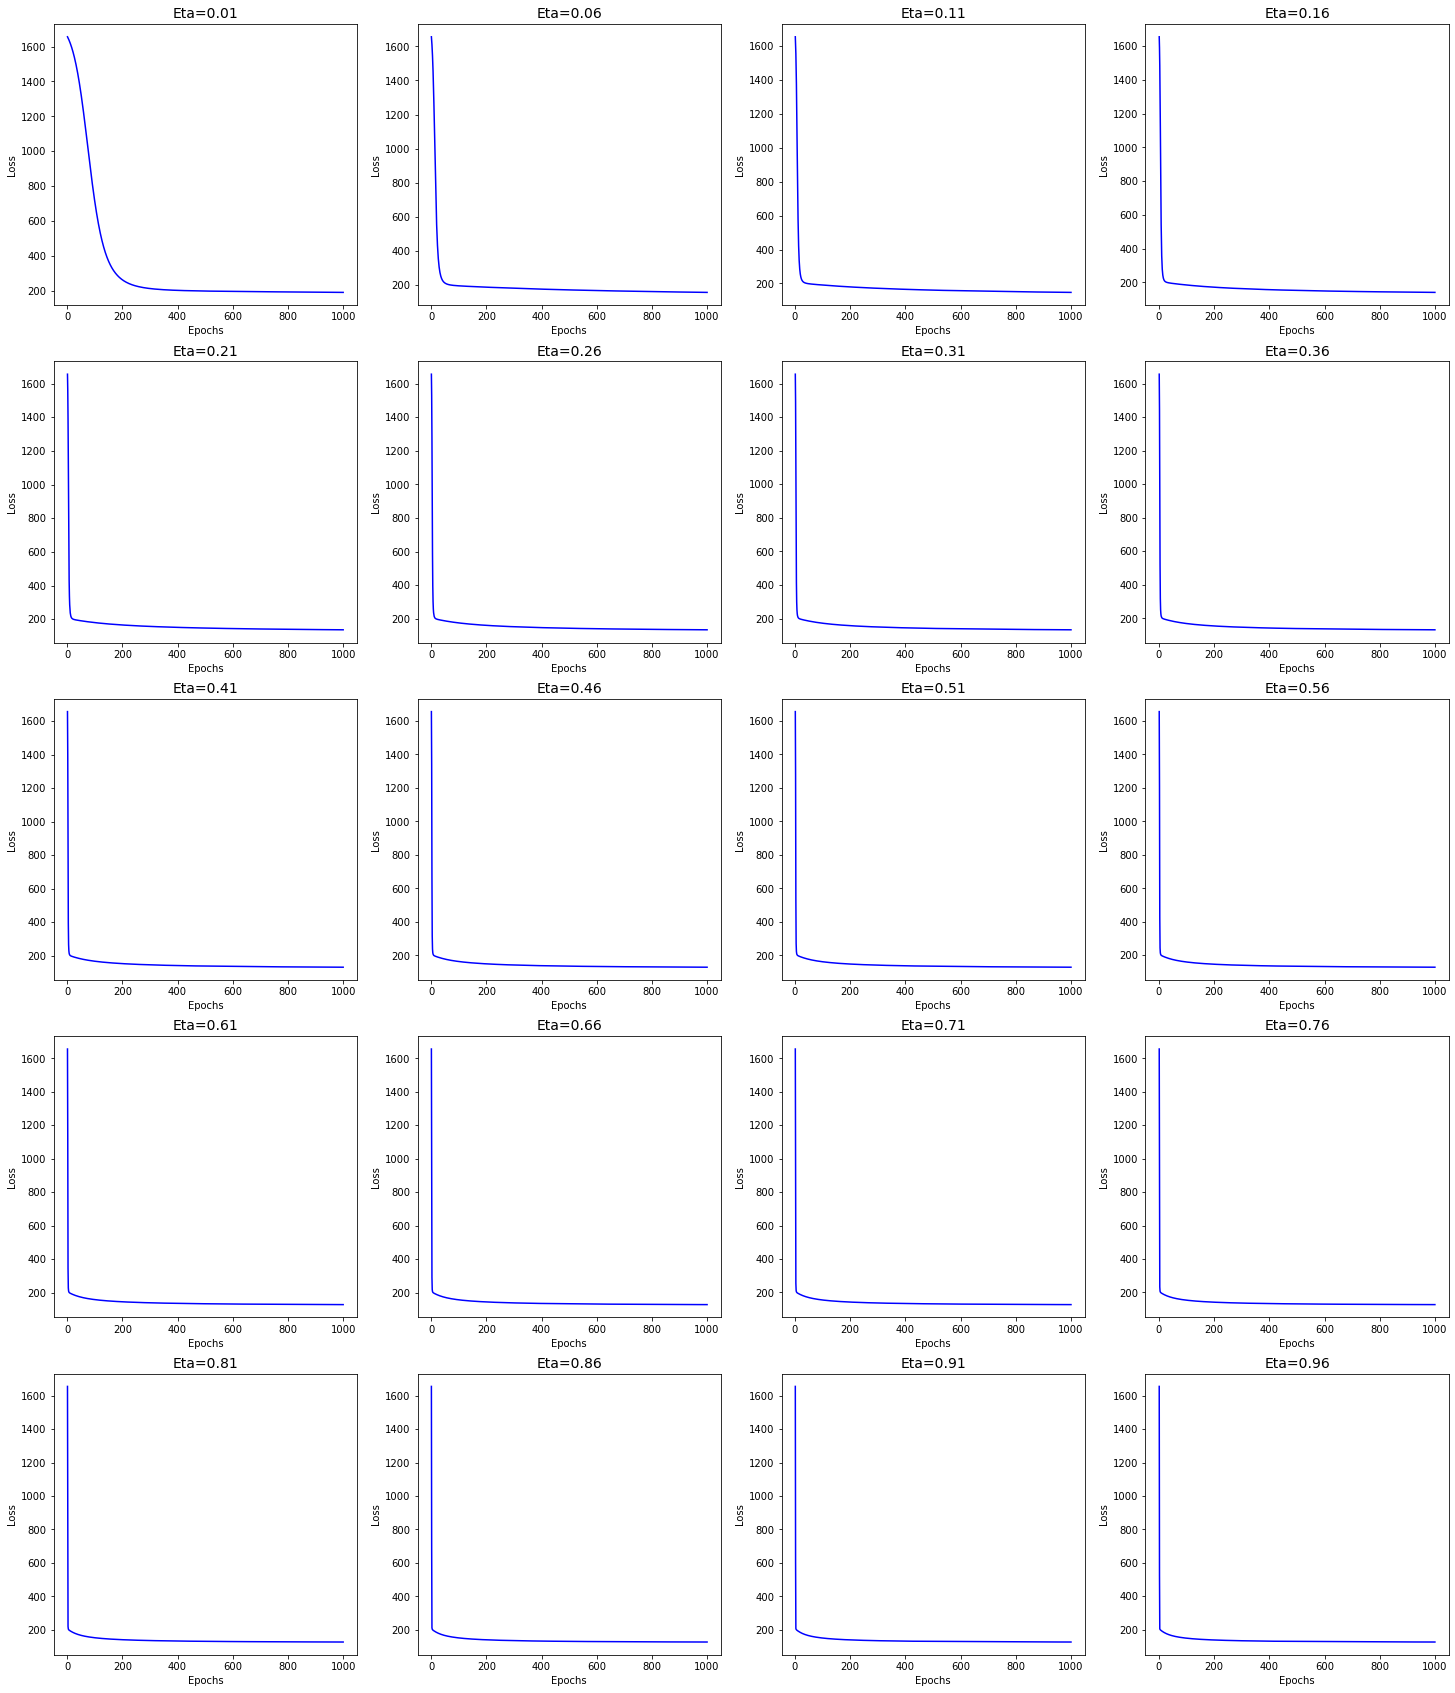

In [47]:
##Plot 1000 epochs by value of loss for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in lossValues_df_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df = lossValues_df_all.loc[lossValues_df_all['learning_rate']==k, ['epochs', 'loss']]
    plt.plot(df['epochs'], df['loss'], c='blue')
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("Loss", fontsize=10)

_Setting ylim to (0,1) for additional visibility_

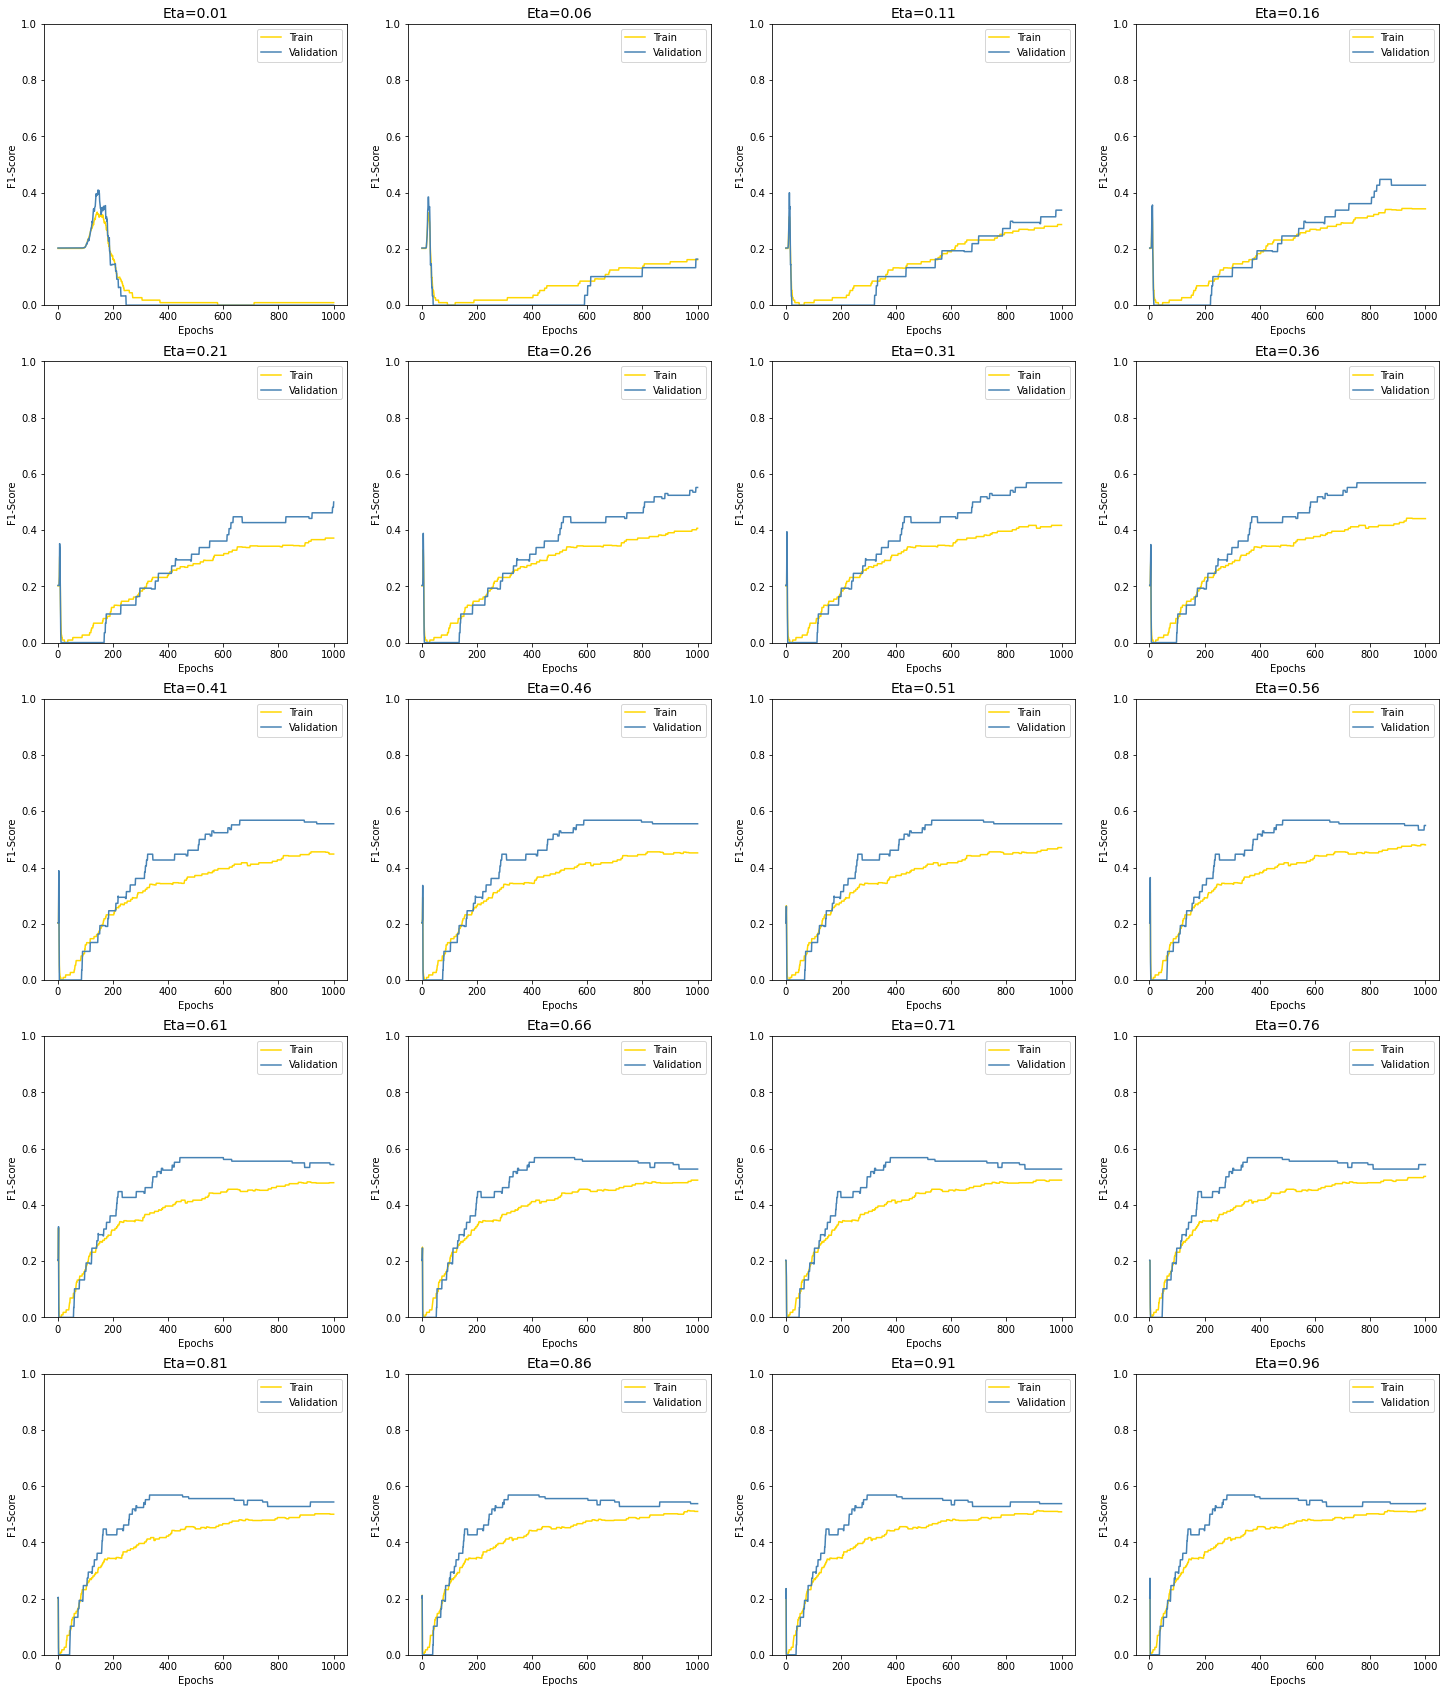

In [48]:
##Plot 1000 epochs by value of F1-score for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in train_score_df_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df1 = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_train']]
    df2 = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_validation']]
    plt.plot(df1['epochs'], df1['f1_score_train'], c='gold', label="Train")
    plt.plot(df2['epochs'], df2['f1_score_validation'], c='steelblue', label="Validation")
    plt.legend(loc="best")
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("F1-Score", fontsize=10)
    plt.ylim((0,1))

In [49]:
##Aggrgate epochs to check stats for each level of eta
df1 = train_score_df_all.groupby('learning_rate').agg({'f1_score_train':'max', 'f1_score_validation':'max'}).reset_index()

df2 = lossValues_df_all.groupby('learning_rate').agg({'loss':'min'}).reset_index()

df1 = df1.merge(df2)

df1['Diff_Score_pct'] = round(((df1['f1_score_train'] - df1['f1_score_validation'])/df1['f1_score_validation'])*100,1)

df1['Change_loss_pct'] = df1['loss'].shift(1)

df1['Change_loss_pct'] = round((abs(df1['loss'] - df1['Change_loss_pct'])/df1['Change_loss_pct'])*100,1)

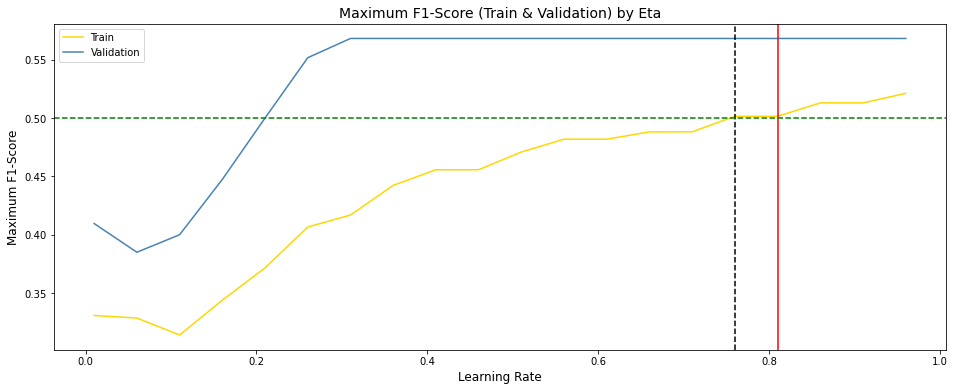

In [50]:
##Plot Maximum F1-Score achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['f1_score_train'], c='gold', label="Train")
plt.plot(df1['learning_rate'], df1['f1_score_validation'], c='steelblue', label="Validation")
plt.legend(loc="best")
plt.title("Maximum F1-Score (Train & Validation) by Eta", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Maximum F1-Score", fontsize=12)
plt.axvline(x=0.76, color='k', linestyle='--')
plt.axvline(x=0.81, color='red', linestyle='-')
plt.axhline(y=0.50, color='green', linestyle='--')
plt.show()

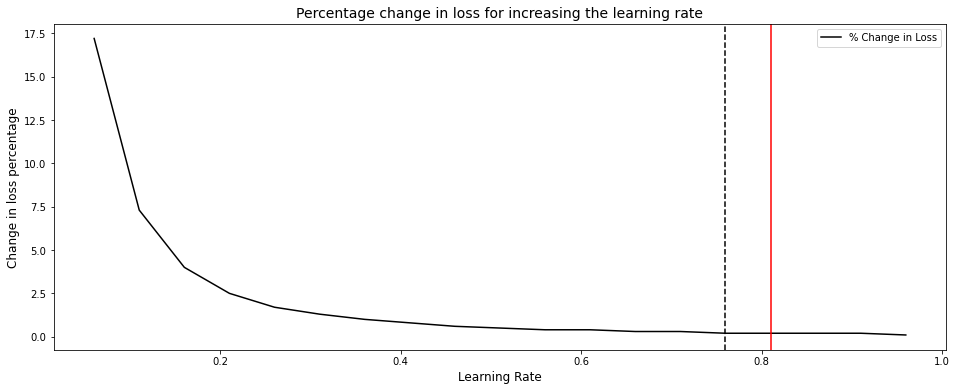

In [51]:
##Plot minimum loss achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['Change_loss_pct'], c='black', label="% Change in Loss")
plt.legend(loc="best")
plt.title("Percentage change in loss for increasing the learning rate", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Change in loss percentage", fontsize=12)
plt.axvline(x=0.76, color='k', linestyle='--')
plt.axvline(x=0.81, color='red', linestyle='-')
plt.show()

In [52]:
##Process to extract trained weights for best learning rate and epoch
wdata = WeightValues_df_all.copy()
wdata['index'] = wdata.index
wdata.reset_index(drop=True, inplace=True)
wdata['learning_rate'] = wdata['learning_rate'].astype('float')

k = wdata['learning_rate'].unique()[16]
df = wdata.loc[wdata['learning_rate']==k, ]
df.reset_index(drop=True, inplace=True)

sdata = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_train', 'f1_score_validation']]
sdata.reset_index(drop=True, inplace=True)
df = pd.concat([df, sdata], axis=1)

df = df.loc[(df['f1_score_train']==df['f1_score_train'].max()), ]
df = df.loc[(df['f1_score_validation']==df['f1_score_validation'].max()), ]
df = df.loc[(df['epochs']==df['epochs'].max()), ]

best_weight = df.iloc[:, :16].values
best_weight = best_weight.reshape(-1,)
best_weight.shape

(16,)

In [53]:
wdata['learning_rate'].unique()[16]

0.81

In [54]:
del wdata

In [55]:
#Call sigmoid function to get predictions for validation set
pred_test = sigmoid_activation(X_test_scaled.dot(best_weight))
##Evaluate validation labels from predicted probability
label_test = [0 if i < 0.5 else 1 for i in pred_test]
##Store f1_score for validation set
score_test = round(f1_score(y_test.values.flatten(), label_test),4)
score_test

0.3585

In [56]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

In [57]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,20,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (pred_test>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)

<ipython-input-57-6955bccdbb05>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall_0 = round(TN/(TN+FP),3)
<ipython-input-57-6955bccdbb05>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall_1 = round(TP/(TP+FN),3)


In [58]:
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

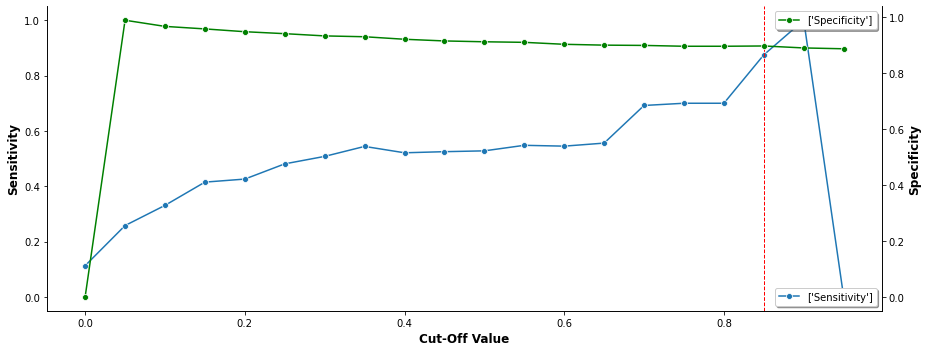

In [59]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.85, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [60]:
##Without thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.50).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(round(TP/(TP+FN),3)*100,2)
test_precision = round(TP/(TP+FP),3)*100
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 52.8 percent and Test Precision is 27.1 percent


In [61]:
##With thresholding
confusion_matrix(y_test.values, (pred_test>0.85).astype(int).reshape(-1,1), labels=[0,1])

array([[547,   1],
       [ 63,   7]], dtype=int64)

In [62]:
##With thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.85).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)*100
test_precision = round(TP/(TP+FP),3)*100
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 87.5 percent and Test Precision is 10.0 percent


In [63]:
average_precision_score(y_test.values, pred_test)

0.4981245412601873

In [64]:
del df, sdata, df1, df2

In [65]:
# WeightValues_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GD/WeightValues_df_all.csv",
#                            index=True)

# train_score_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GD/train_score_df_all.csv",
#                               index=True)

# lossValues_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GD/lossValues_df_all.csv",
#                       index=True)

In [66]:
del WeightValues_df_all, train_score_df_all, lossValues_df_all

**Gradient Descent Approach - Cross Entropy loss**

In [67]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

In [68]:
def gradient_descent_ce(lr):
    np.random.seed(123)
    WeightMatrix = np.random.uniform(size=(X_train_scaled.shape[1],))
    ##Create blank dataframes with column names for pd.concat at the end
    lossValues_df_all = pd.DataFrame(columns=['epochs', 'loss', 'learning_rate'])

    train_score_df_all = pd.DataFrame(columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])

    WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome'])
    ##For each value of eta (learning rate) we need to run certain epochs
    ##Each epoch would complete seeing 100% of train set one by one with one set of weights
    lossValues = []
    train_score = []
    WeightValues0 = []
    WeightValues1 = []
    for epoch in np.arange(0, 1000):
        learning_rate = lr
        preds = sigmoid_activation(X_train_scaled.dot(WeightMatrix))
        error = (1 - y_train.values.flatten()*preds)**2
        label = [0 if i < 0.5 else 1 for i in preds]
        score_train = round(f1_score(y_train.values.flatten(), label),4)
        pred_valid = sigmoid_activation(X_valid_scaled.dot(WeightMatrix))
        label_valid = [0 if i < 0.5 else 1 for i in pred_valid]
        score_valid = round(f1_score(y_valid.values.flatten(), label_valid),4)
        score_list = [epoch+1, score_train, score_valid, learning_rate]
        train_score.append(score_list)
        loss = round(cross_entropy(preds, y_train.values.flatten()),2)
        loss_list = [epoch+1, loss, learning_rate]
        lossValues.append(loss_list)
        gradient = X_train_scaled.T.dot(error) / X_train_scaled.shape[0]
        W_list0 = epoch+1
        W_list1 = WeightMatrix
        WeightValues0.append(W_list0)
        WeightValues1.append(W_list1.copy())
        WeightMatrix += -learning_rate * gradient
        lossValues_df = pd.DataFrame(lossValues, columns=['epochs', 'loss', 'learning_rate'])
        train_score_df = pd.DataFrame(train_score, columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])
        WeightValues_df = pd.DataFrame(WeightValues1,
                           columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome'], 
                           index=[WeightValues0])
        WeightValues_df['learning_rate'] = learning_rate
    
    ##Append result of each eta and total number of epochs for plotting
    lossValues_df_all = pd.concat([lossValues_df_all, lossValues_df], ignore_index=True, axis=0)
    train_score_df_all = pd.concat([train_score_df_all, train_score_df], ignore_index=True, axis=0)
    WeightValues_df_all = pd.concat([WeightValues_df_all, WeightValues_df], ignore_index=False, axis=0)
    
    return lossValues_df_all, train_score_df_all, WeightValues_df_all

In [69]:
results = gradient_descent_ce(0.01)
a0 = results[0]
b0 = results[1]
c0 = results[2]
del results

results = gradient_descent_ce(0.06)
a1 = results[0]
b1 = results[1]
c1 = results[2]
del results

results = gradient_descent_ce(0.11)
a2 = results[0]
b2 = results[1]
c2 = results[2]
del results

results = gradient_descent_ce(0.16)
a3 = results[0]
b3 = results[1]
c3 = results[2]
del results

results = gradient_descent_ce(0.21)
a4 = results[0]
b4 = results[1]
c4 = results[2]
del results

results = gradient_descent_ce(0.26)
a5 = results[0]
b5 = results[1]
c5 = results[2]
del results

results = gradient_descent_ce(0.31)
a6 = results[0]
b6 = results[1]
c6 = results[2]
del results

results = gradient_descent_ce(0.36)
a7 = results[0]
b7 = results[1]
c7 = results[2]
del results

results = gradient_descent_ce(0.41)
a8 = results[0]
b8 = results[1]
c8 = results[2]
del results

results = gradient_descent_ce(0.46)
a9 = results[0]
b9 = results[1]
c9 = results[2]
del results

results = gradient_descent_ce(0.51)
a10 = results[0]
b10 = results[1]
c10 = results[2]
del results

results = gradient_descent_ce(0.56)
a11 = results[0]
b11 = results[1]
c11 = results[2]
del results

results = gradient_descent_ce(0.61)
a12 = results[0]
b12 = results[1]
c12 = results[2]
del results

results = gradient_descent_ce(0.66)
a13 = results[0]
b13 = results[1]
c13 = results[2]
del results

results = gradient_descent_ce(0.71)
a14 = results[0]
b14 = results[1]
c14 = results[2]
del results

results = gradient_descent_ce(0.76)
a15 = results[0]
b15 = results[1]
c15 = results[2]
del results

results = gradient_descent_ce(0.81)
a16 = results[0]
b16 = results[1]
c16 = results[2]
del results

results = gradient_descent_ce(0.86)
a17 = results[0]
b17 = results[1]
c17 = results[2]
del results

results = gradient_descent_ce(0.91)
a18 = results[0]
b18 = results[1]
c18 = results[2]
del results

results = gradient_descent_ce(0.96)
a19 = results[0]
b19 = results[1]
c19 = results[2]
del results

<ipython-input-34-f1263d2e1f82>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


In [70]:
lossValues_df_all = pd.DataFrame(columns=['epochs', 'loss', 'learning_rate'])

In [71]:
lossValues_df_all = pd.concat([lossValues_df_all, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11,
                              a12, a13, a14, a15, a16, a17, a18, a19], ignore_index=True, axis=0)

In [72]:
train_score_df_all = pd.DataFrame(columns=['epochs', 'f1_score_train', 'f1_score_validation', 'learning_rate'])

In [73]:
train_score_df_all = pd.concat([train_score_df_all, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11,
                              b12, b13, b14, b15, b16, b17, b18, b19], ignore_index=True, axis=0)

In [74]:
WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome', 'learning_rate'])

In [75]:
WeightValues_df_all = pd.concat([WeightValues_df_all, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,
                              c12, c13, c14, c15, c16, c17, c18, c19], ignore_index=True, axis=0)

In [76]:
del a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19

In [77]:
del b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19

In [78]:
del c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19

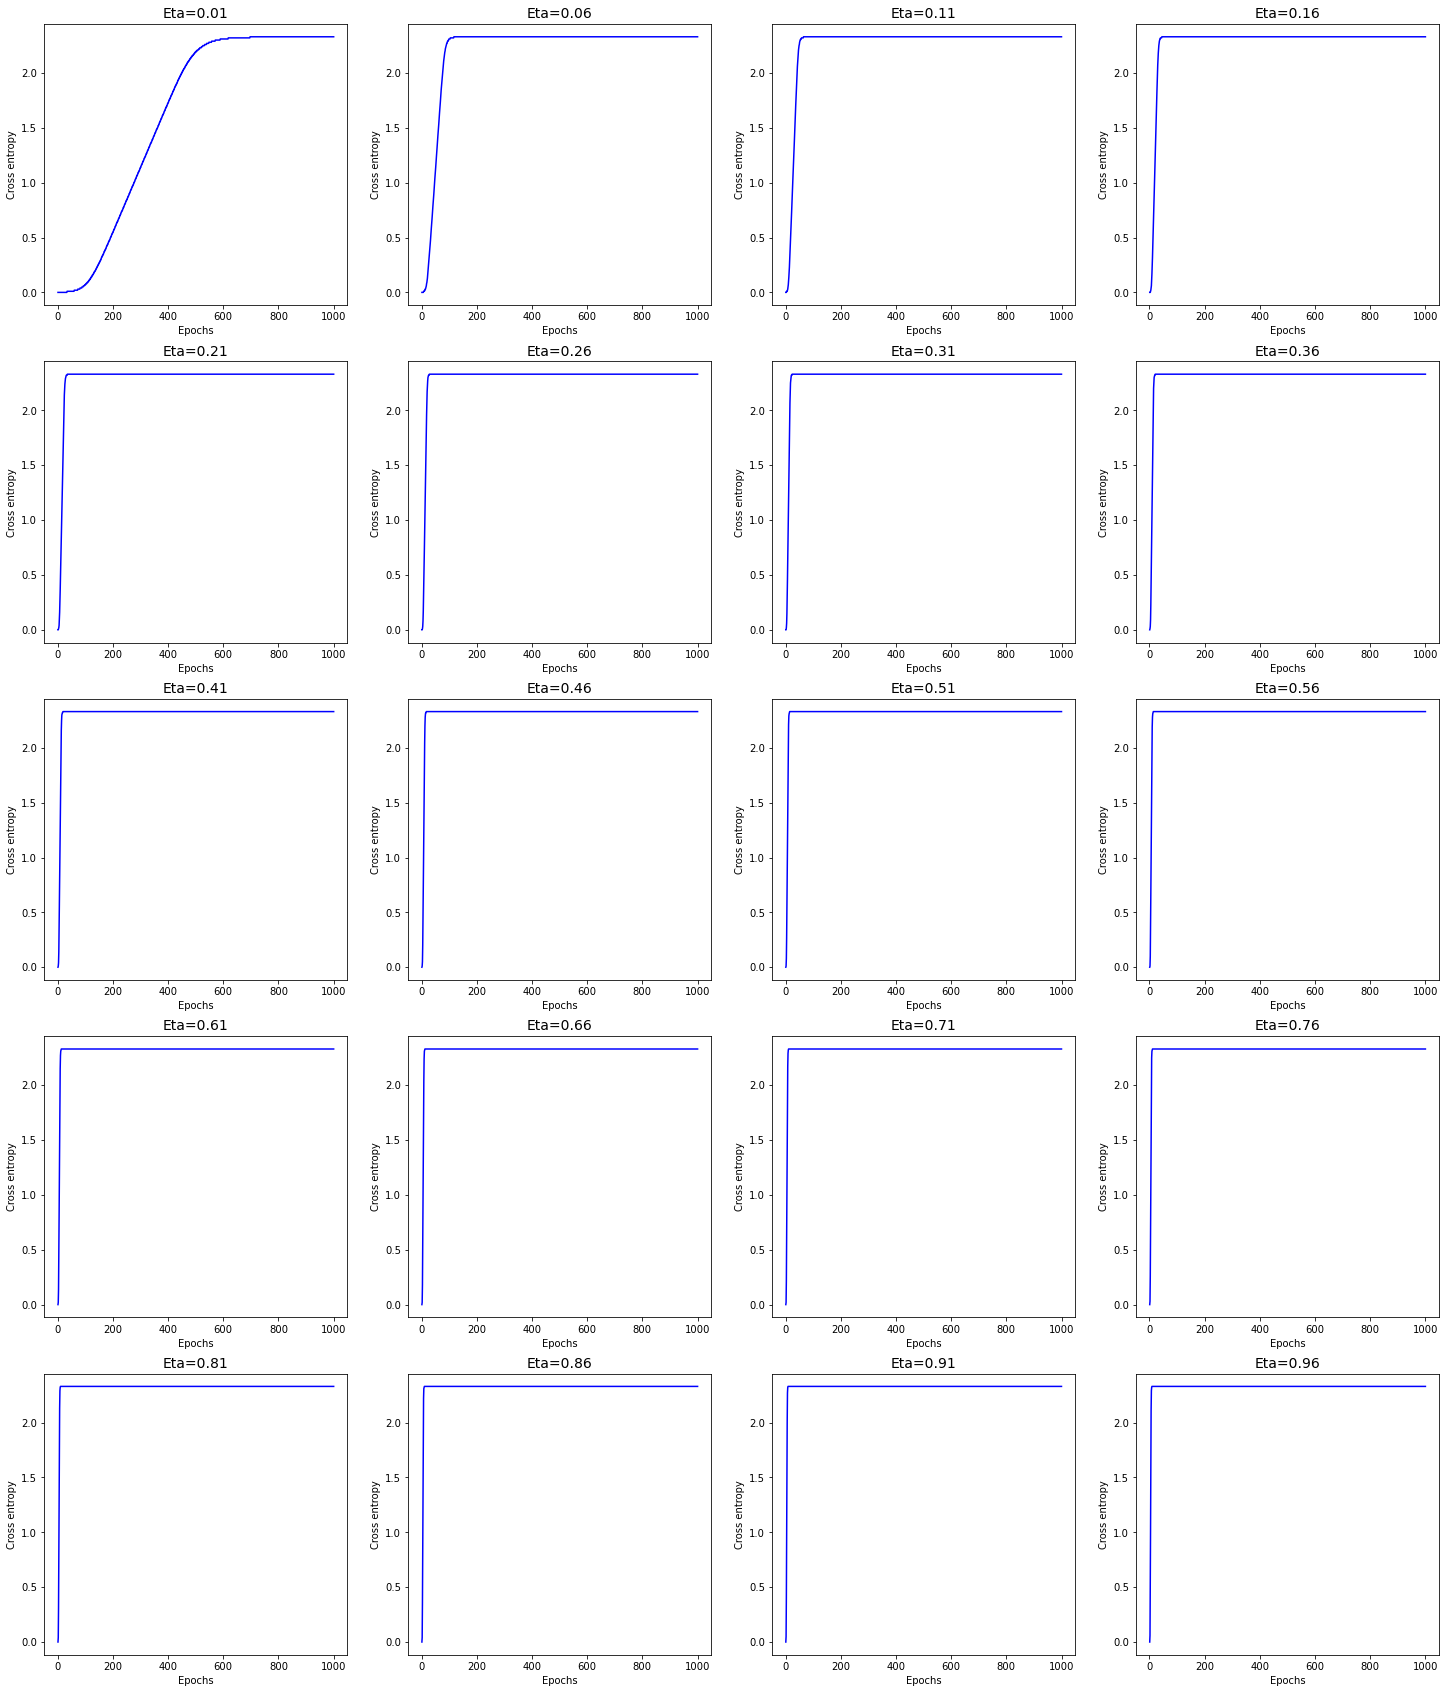

In [79]:
##Plot 1000 epochs by value of loss for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in lossValues_df_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df = lossValues_df_all.loc[lossValues_df_all['learning_rate']==k, ['epochs', 'loss']]
    plt.plot(df['epochs'], df['loss'], c='blue')
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("Cross entropy", fontsize=10)

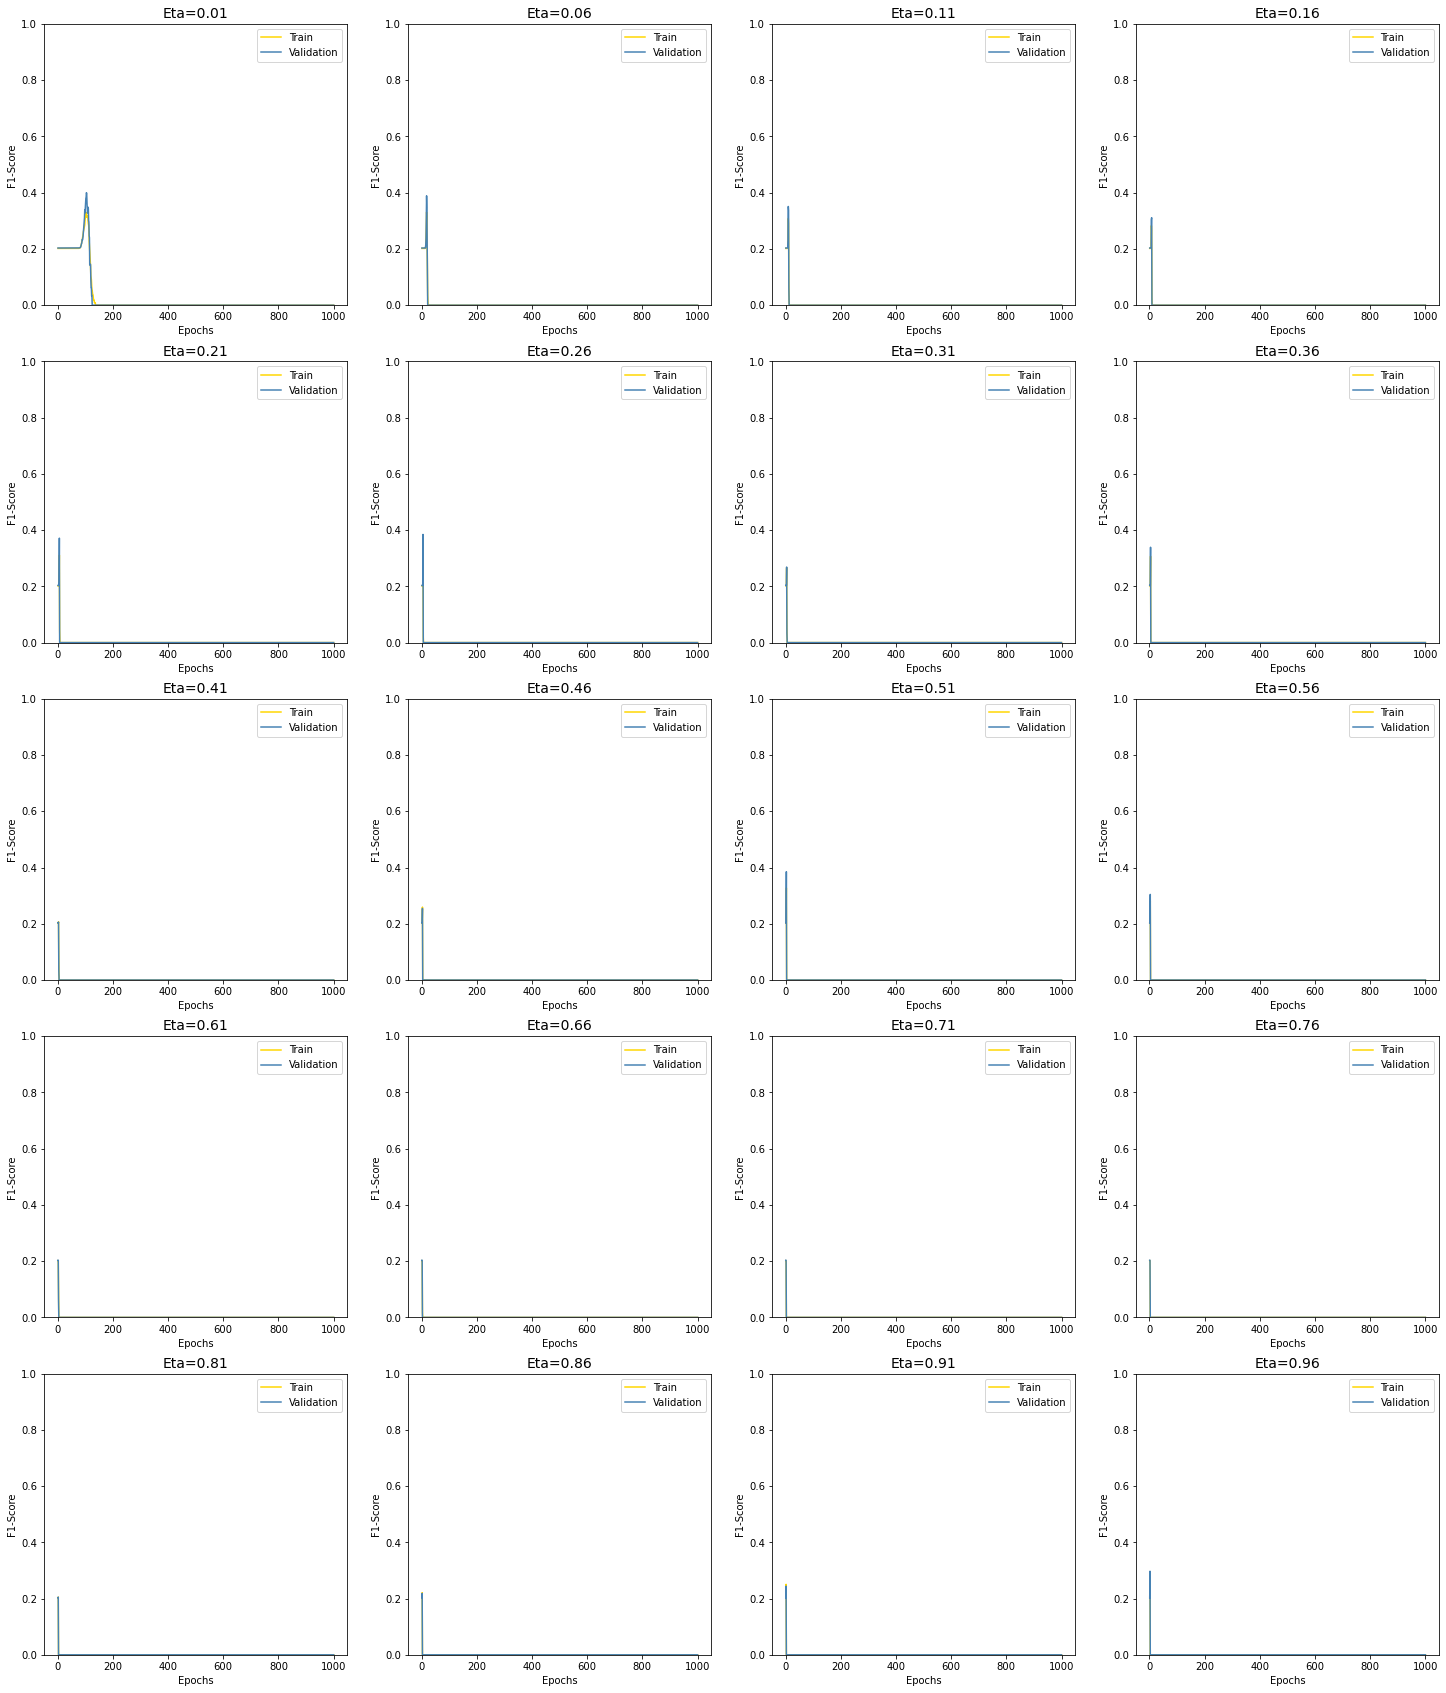

In [80]:
##Plot 1000 epochs by value of F1-score for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in train_score_df_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df1 = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_train']]
    df2 = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_validation']]
    plt.plot(df1['epochs'], df1['f1_score_train'], c='gold', label="Train")
    plt.plot(df2['epochs'], df2['f1_score_validation'], c='steelblue', label="Validation")
    plt.legend(loc="best")
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("F1-Score", fontsize=10)
    plt.ylim((0,1))

In [81]:
##Aggrgate epochs to check stats for each level of eta
df1 = train_score_df_all.groupby('learning_rate').agg({'f1_score_train':'max', 'f1_score_validation':'max'}).reset_index()

df2 = lossValues_df_all.groupby('learning_rate').agg({'loss':'mean'}).reset_index()

df1 = df1.merge(df2)

df1['Diff_Score_pct'] = round(((df1['f1_score_train'] - df1['f1_score_validation'])/df1['f1_score_validation'])*100,1)

df1['Change_loss_pct'] = df1['loss'].shift(1)

df1['Change_loss_pct'] = round((abs(df1['loss'] - df1['Change_loss_pct'])/df1['Change_loss_pct'])*100,1)

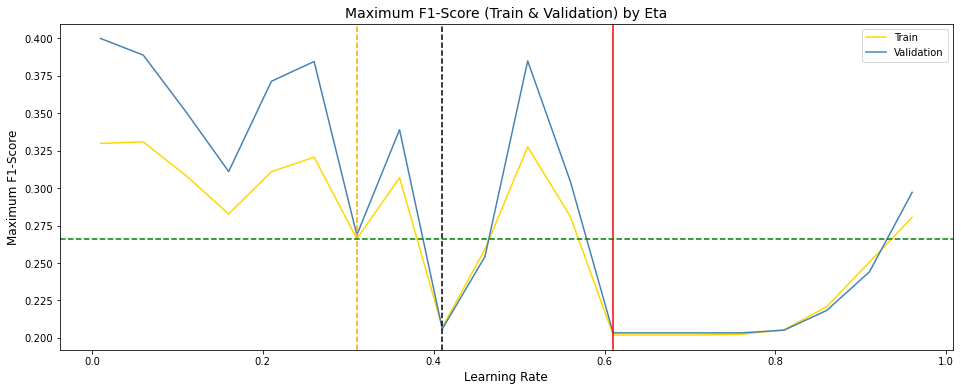

In [82]:
##Plot Maximum F1-Score achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['f1_score_train'], c='gold', label="Train")
plt.plot(df1['learning_rate'], df1['f1_score_validation'], c='steelblue', label="Validation")
plt.legend(loc="best")
plt.title("Maximum F1-Score (Train & Validation) by Eta", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Maximum F1-Score", fontsize=12)
plt.axvline(x=0.31, color='orange', linestyle='--')
plt.axvline(x=0.41, color='k', linestyle='--')
plt.axvline(x=0.61, color='red', linestyle='-')
plt.axhline(y=0.2661, color='green', linestyle='--')
plt.show()

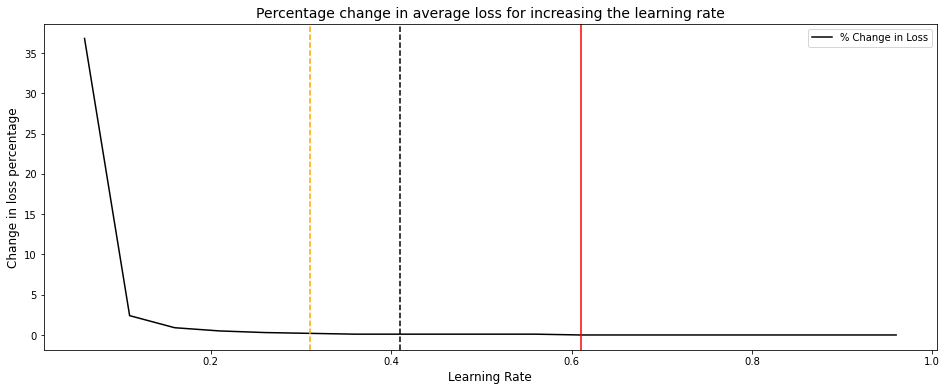

In [83]:
##Plot minimum loss achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['Change_loss_pct'], c='black', label="% Change in Loss")
plt.legend(loc="best")
plt.title("Percentage change in average loss for increasing the learning rate", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Change in loss percentage", fontsize=12)
plt.axvline(x=0.31, color='orange', linestyle='--')
plt.axvline(x=0.41, color='k', linestyle='--')
plt.axvline(x=0.61, color='red', linestyle='-')
plt.show()

In [84]:
##Process to extract trained weights for best learning rate and epoch
wdata = WeightValues_df_all.copy()
wdata['index'] = wdata.index
wdata.reset_index(drop=True, inplace=True)
wdata['learning_rate'] = wdata['learning_rate'].astype('float')

k = wdata['learning_rate'].unique()[16]
df = wdata.loc[wdata['learning_rate']==k, ]
df.reset_index(drop=True, inplace=True)

sdata = train_score_df_all.loc[train_score_df_all['learning_rate']==k, ['epochs', 'f1_score_train', 'f1_score_validation']]
sdata.reset_index(drop=True, inplace=True)
df = pd.concat([df, sdata], axis=1)

df = df.loc[(df['f1_score_train']==df['f1_score_train'].max()), ]
df = df.loc[(df['f1_score_validation']==df['f1_score_validation'].max()), ]
df = df.loc[(df['epochs']==df['epochs'].max()), ]

best_weight = df.iloc[:, :16].values
best_weight = best_weight.reshape(-1,)
best_weight.shape

(16,)

In [85]:
wdata['learning_rate'].unique()[6]

0.31

In [86]:
del wdata

In [87]:
#Call sigmoid function to get predictions for validation set
pred_test = sigmoid_activation(X_test_scaled.dot(best_weight))
##Evaluate validation labels from predicted probability
label_test = [0 if i < 0.5 else 1 for i in pred_test]
##Store f1_score for validation set
score_test = round(f1_score(y_test.values.flatten(), label_test),4)
score_test

0.2062

In [88]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,20,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (pred_test>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)

<ipython-input-88-6955bccdbb05>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall_0 = round(TN/(TN+FP),3)
<ipython-input-88-6955bccdbb05>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall_1 = round(TP/(TP+FN),3)


In [89]:
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

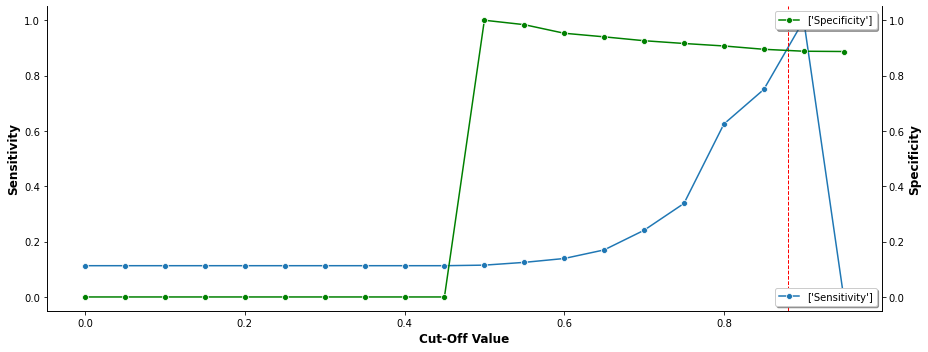

In [90]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.88, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [91]:
##Without thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.50).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(round(TP/(TP+FN),3)*100,2)
test_precision = round(TP/(TP+FP),3)*100
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 11.5 percent and Test Precision is 100.0 percent


In [92]:
##With thresholding
confusion_matrix(y_test.values, (pred_test>0.90).astype(int).reshape(-1,1), labels=[0,1])

array([[548,   0],
       [ 69,   1]], dtype=int64)

In [93]:
##With thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.90).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)*100
test_precision = round(round(TP/(TP+FP),3)*100,2)
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 100.0 percent and Test Precision is 1.4 percent


In [94]:
average_precision_score(y_test.values, pred_test)

0.34582041762611837

In [95]:
del df, sdata, df1, df2

In [96]:
# WeightValues_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GDCE/WeightValues_df_all.csv",
#                            index=True)

# train_score_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GDCE/train_score_df_all.csv",
#                               index=True)

# lossValues_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/GDCE/lossValues_df_all.csv",
#                       index=True)

In [97]:
del WeightValues_df_all, train_score_df_all, lossValues_df_all

**Mini Batch Gradient Descent - Squared loss**

In [98]:
##Set seed to np.random
##Initialize random weight matrix with uniform distribution
np.random.seed(123)
WeightMatrix = np.random.uniform(size=(X_train_scaled.shape[1],))

In [99]:
##Check shape of initial weight matrix
WeightMatrix.shape

(16,)

In [100]:
##Create logistic sigmoid function based on which predictions would be made
##The dot product of input matrix and weight matrix would pass through the activation function
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

__Important cell for collating Mini Batch Gradient descent results__

In [101]:
def bgd(lr):
    np.random.seed(123)
    WeightMatrix = np.random.uniform(size=(X_train_scaled.shape[1],))
    
    WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome', 'learning_rate'])
    batch_loss_average_all = pd.DataFrame(columns=['batch_loss_average', 'learning_rate'])
    batch_loss_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'batch_loss_average'])

    batch_score_average_all = pd.DataFrame(columns=['batch_f1score_average', 'learning_rate'])
    batch_score_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'batch_f1score_average'])

    valid_score_average_all = pd.DataFrame(columns=['valid_f1_score', 'learning_rate'])
    valid_score_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'valid_f1_score'])
    ##For each value of eta (learning rate) we need to run certain epochs
    ##Each epoch would complete seeing 100% of train set one by one with one set of weights
    lossValues = []
    lossValues1 = []
    trainValues = []
    trainValues1 = []
    validValues = []
    validValues1 = []
    for epoch in np.arange(0, 1000):
        epochLoss = []
        train_score = []
        valid_score = []
        WeightValues0 = []
        WeightValues1 = []
        for (batchX, batchY) in next_batch(X_train_scaled, y_train, 64):
            learning_rate = lr
            preds = sigmoid_activation(batchX.dot(WeightMatrix))
            error = preds - batchY.values.flatten()
            label = [0 if i < 0.5 else 1 for i in preds]
            score_train = round(f1_score(batchY.values.flatten(), label),4)
            train_score.append(score_train)
            loss = round(np.sum(error ** 2),2)
            epochLoss.append(loss)
            gradient = batchX.T.dot(error) / batchX.shape[0]
            W_list0 = epoch+1
            W_list1 = WeightMatrix
            WeightValues0.append(W_list0.copy())
            WeightValues1.append(W_list1.copy())
            pred_valid = sigmoid_activation(X_valid_scaled.dot(WeightMatrix))
            label_valid = [0 if i < 0.5 else 1 for i in pred_valid]
            score_valid = round(f1_score(y_valid.values.flatten(), label_valid),4)
            valid_score.append(score_valid)
            WeightMatrix += -learning_rate * gradient
            
        train_score_list = [epoch+1, train_score]
        trainValues1.append(train_score_list)
        trainValues.append(np.average(train_score))
        
        loss_list = [epoch+1, epochLoss]
        lossValues1.append(loss_list)
        lossValues.append(np.average(epochLoss))
        
        valid_score_list = [epoch+1, valid_score]
        validValues1.append(valid_score_list)
        validValues.append(np.average(valid_score))
    
    WeightValues_df = pd.DataFrame(WeightValues1,
                           columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome'], 
                           index=[WeightValues0])
    WeightValues_df['learning_rate'] = learning_rate
    WeightValues_df.reset_index(drop=True, inplace=True)
    
    batch_loss = pd.DataFrame()
    a = pd.DataFrame.from_records(lossValues1, columns=['epoch', 'batch_loss'])
    for i in range(len(a)):
        b = a['batch_loss'][i]
        c = pd.DataFrame(b).transpose()
        c.columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31']
        batch_loss = pd.concat([batch_loss, c], ignore_index=True, axis=0)
        
    batch_loss_average = pd.DataFrame(lossValues, columns=['batch_loss_average'])
    batch_loss_average['learning_rate'] = learning_rate
    batch_loss['learning_rate'] = learning_rate
    batch_loss['batch_loss_average'] = batch_loss.loc[:, batch_loss.columns[:-1]].mean(axis=1)
    
    batch_score = pd.DataFrame()
    a1 = pd.DataFrame.from_records(trainValues1, columns=['epoch', 'batch_f1_score'])
    for i in range(len(a1)):
        b1 = a1['batch_f1_score'][i]
        c1 = pd.DataFrame(b1).transpose()
        c1.columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31']
        batch_score = pd.concat([batch_score, c1], ignore_index=True, axis=0)
        
    batch_score_average = pd.DataFrame(trainValues, columns=['batch_f1score_average'])
    batch_score_average['learning_rate'] = learning_rate
    batch_score['learning_rate'] = learning_rate
    batch_score['batch_f1score_average'] = batch_score.loc[:, batch_score.columns[:-1]].mean(axis=1)
    
    valid_score_ = pd.DataFrame()
    a2 = pd.DataFrame.from_records(validValues1, columns=['epoch', 'valid_f1_score'])
    for i in range(len(a2)):
        b2 = a2['valid_f1_score'][i]
        c2 = pd.DataFrame(b2).transpose()
        c2.columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31']
        valid_score_ = pd.concat([valid_score_, c2], ignore_index=True, axis=0)
        
    valid_score_average = pd.DataFrame(validValues, columns=['valid_f1_score'])
    valid_score_average['learning_rate'] = learning_rate
    valid_score_['learning_rate'] = learning_rate
    valid_score_['valid_f1_score'] = valid_score_.loc[:, valid_score_.columns[:-1]].mean(axis=1)
        

    
    ##Append result of each eta and total number of epochs for plotting
    WeightValues_df_all = pd.concat([WeightValues_df_all, WeightValues_df], ignore_index=False, axis=0)
    
    batch_loss_average_all = pd.concat([batch_loss_average_all, batch_loss_average], ignore_index=True, axis=0)
    batch_loss_all = pd.concat([batch_loss_all, batch_loss], ignore_index=True, axis=0)
    
    batch_score_average_all = pd.concat([batch_score_average_all, batch_score_average], ignore_index=True, axis=0)
    batch_score_all = pd.concat([batch_score_all, batch_score], ignore_index=True, axis=0)
    
    valid_score_average_all = pd.concat([valid_score_average_all, valid_score_average], ignore_index=True, axis=0)
    valid_score_all = pd.concat([valid_score_all, valid_score_], ignore_index=True, axis=0)
    
    return WeightValues_df_all, batch_loss_average_all, batch_loss_all, batch_score_average_all, batch_score_all, valid_score_average_all, valid_score_all 

In [102]:
results = bgd(0.01)
a0 = results[0]
b0 = results[1]
c0 = results[2]
d0 = results[3]
e0 = results[4]
f0 = results[5]
g0 = results[6]
del results

results = bgd(0.06)
a1 = results[0]
b1 = results[1]
c1 = results[2]
d1 = results[3]
e1 = results[4]
f1 = results[5]
g1 = results[6]
del results

results = bgd(0.11)
a2 = results[0]
b2 = results[1]
c2 = results[2]
d2 = results[3]
e2 = results[4]
f2 = results[5]
g2 = results[6]
del results

results = bgd(0.16)
a3 = results[0]
b3 = results[1]
c3 = results[2]
d3 = results[3]
e3 = results[4]
f3 = results[5]
g3 = results[6]
del results

results = bgd(0.21)
a4 = results[0]
b4 = results[1]
c4 = results[2]
d4 = results[3]
e4 = results[4]
f4 = results[5]
g4 = results[6]
del results

results = bgd(0.26)
a5 = results[0]
b5 = results[1]
c5 = results[2]
d5 = results[3]
e5 = results[4]
f5 = results[5]
g5 = results[6]
del results

results = bgd(0.31)
a6 = results[0]
b6 = results[1]
c6 = results[2]
d6 = results[3]
e6 = results[4]
f6 = results[5]
g6 = results[6]
del results

results = bgd(0.36)
a7 = results[0]
b7 = results[1]
c7 = results[2]
d7 = results[3]
e7 = results[4]
f7 = results[5]
g7 = results[6]
del results

results = bgd(0.41)
a8 = results[0]
b8 = results[1]
c8 = results[2]
d8 = results[3]
e8 = results[4]
f8 = results[5]
g8 = results[6]
del results

results = bgd(0.46)
a9 = results[0]
b9 = results[1]
c9 = results[2]
d9 = results[3]
e9 = results[4]
f9 = results[5]
g9 = results[6]
del results

results = bgd(0.51)
a10 = results[0]
b10 = results[1]
c10 = results[2]
d10 = results[3]
e10 = results[4]
f10 = results[5]
g10 = results[6]
del results

results = bgd(0.56)
a11 = results[0]
b11 = results[1]
c11 = results[2]
d11 = results[3]
e11 = results[4]
f11 = results[5]
g11 = results[6]
del results

results = bgd(0.61)
a12 = results[0]
b12 = results[1]
c12 = results[2]
d12 = results[3]
e12 = results[4]
f12 = results[5]
g12 = results[6]
del results

results = bgd(0.66)
a13 = results[0]
b13 = results[1]
c13 = results[2]
d13 = results[3]
e13 = results[4]
f13 = results[5]
g13 = results[6]
del results

results = bgd(0.71)
a14 = results[0]
b14 = results[1]
c14 = results[2]
d14 = results[3]
e14 = results[4]
f14 = results[5]
g14 = results[6]
del results

results = bgd(0.76)
a15 = results[0]
b15 = results[1]
c15 = results[2]
d15 = results[3]
e15 = results[4]
f15 = results[5]
g15 = results[6]
del results

results = bgd(0.81)
a16 = results[0]
b16 = results[1]
c16 = results[2]
d16 = results[3]
e16 = results[4]
f16 = results[5]
g16 = results[6]
del results

results = bgd(0.86)
a17 = results[0]
b17 = results[1]
c17 = results[2]
d17 = results[3]
e17 = results[4]
f17 = results[5]
g17 = results[6]
del results

results = bgd(0.91)
a18 = results[0]
b18 = results[1]
c18 = results[2]
d18 = results[3]
e18 = results[4]
f18 = results[5]
g18 = results[6]
del results

results = bgd(0.96)
a19 = results[0]
b19 = results[1]
c19 = results[2]
d19 = results[3]
e19 = results[4]
f19 = results[5]
g19 = results[6]
del results

In [103]:
WeightValues_df_all = pd.DataFrame(columns=['bias', 'age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
                                    'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek', 'duration',
                                    'campaign', 'pdays', 'previous_', 'poutcome', 'learning_rate'])

In [104]:
WeightValues_df_all = pd.concat([WeightValues_df_all, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11,
                              a12, a13, a14, a15, a16, a17, a18, a19], ignore_index=False, axis=0)

In [105]:
batch_loss_average_all = pd.DataFrame(columns=['batch_loss_average', 'learning_rate'])

In [106]:
batch_loss_average_all = pd.concat([batch_loss_average_all, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11,
                              b12, b13, b14, b15, b16, b17, b18, b19], ignore_index=True, axis=0)

In [107]:
batch_loss_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'batch_loss_average'])

In [108]:
batch_loss_all = pd.concat([batch_loss_all, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,
                              c12, c13, c14, c15, c16, c17, c18, c19], ignore_index=True, axis=0)

In [109]:
batch_score_average_all = pd.DataFrame(columns=['batch_f1score_average', 'learning_rate'])

In [110]:
batch_score_average_all = pd.concat([batch_score_average_all, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11,
                              d12, d13, d14, d15, d16, d17, d18, d19], ignore_index=True, axis=0)

In [111]:
batch_score_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'batch_f1score_average'])

In [112]:
batch_score_all = pd.concat([batch_score_all, e0, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11,
                              e12, e13, e14, e15, e16, e17, e18, e19], ignore_index=True, axis=0)

In [113]:
valid_score_average_all = pd.DataFrame(columns=['valid_f1_score', 'learning_rate'])

In [114]:
valid_score_average_all = pd.concat([valid_score_average_all, f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11,
                              f12, f13, f14, f15, f16, f17, f18, f19], ignore_index=True, axis=0)

In [115]:
valid_score_all = pd.DataFrame(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14',
                'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28',
                'b29', 'b30', 'b31', 'learning_rate', 'valid_f1_score'])

In [116]:
valid_score_all = pd.concat([valid_score_all, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11,
                              g12, g13, g14, g15, g16, g17, g18, g19], ignore_index=True, axis=0)

In [117]:
l = len(np.arange(0.01,1,0.05))

batch_loss_average_all['epochs'] = list(np.arange(1, 1001))*l
batch_score_average_all['epochs'] = list(np.arange(1, 1001))*l
valid_score_average_all['epochs'] = list(np.arange(1, 1001))*l
batch_loss_all['epochs'] = list(np.arange(1, 1001))*l

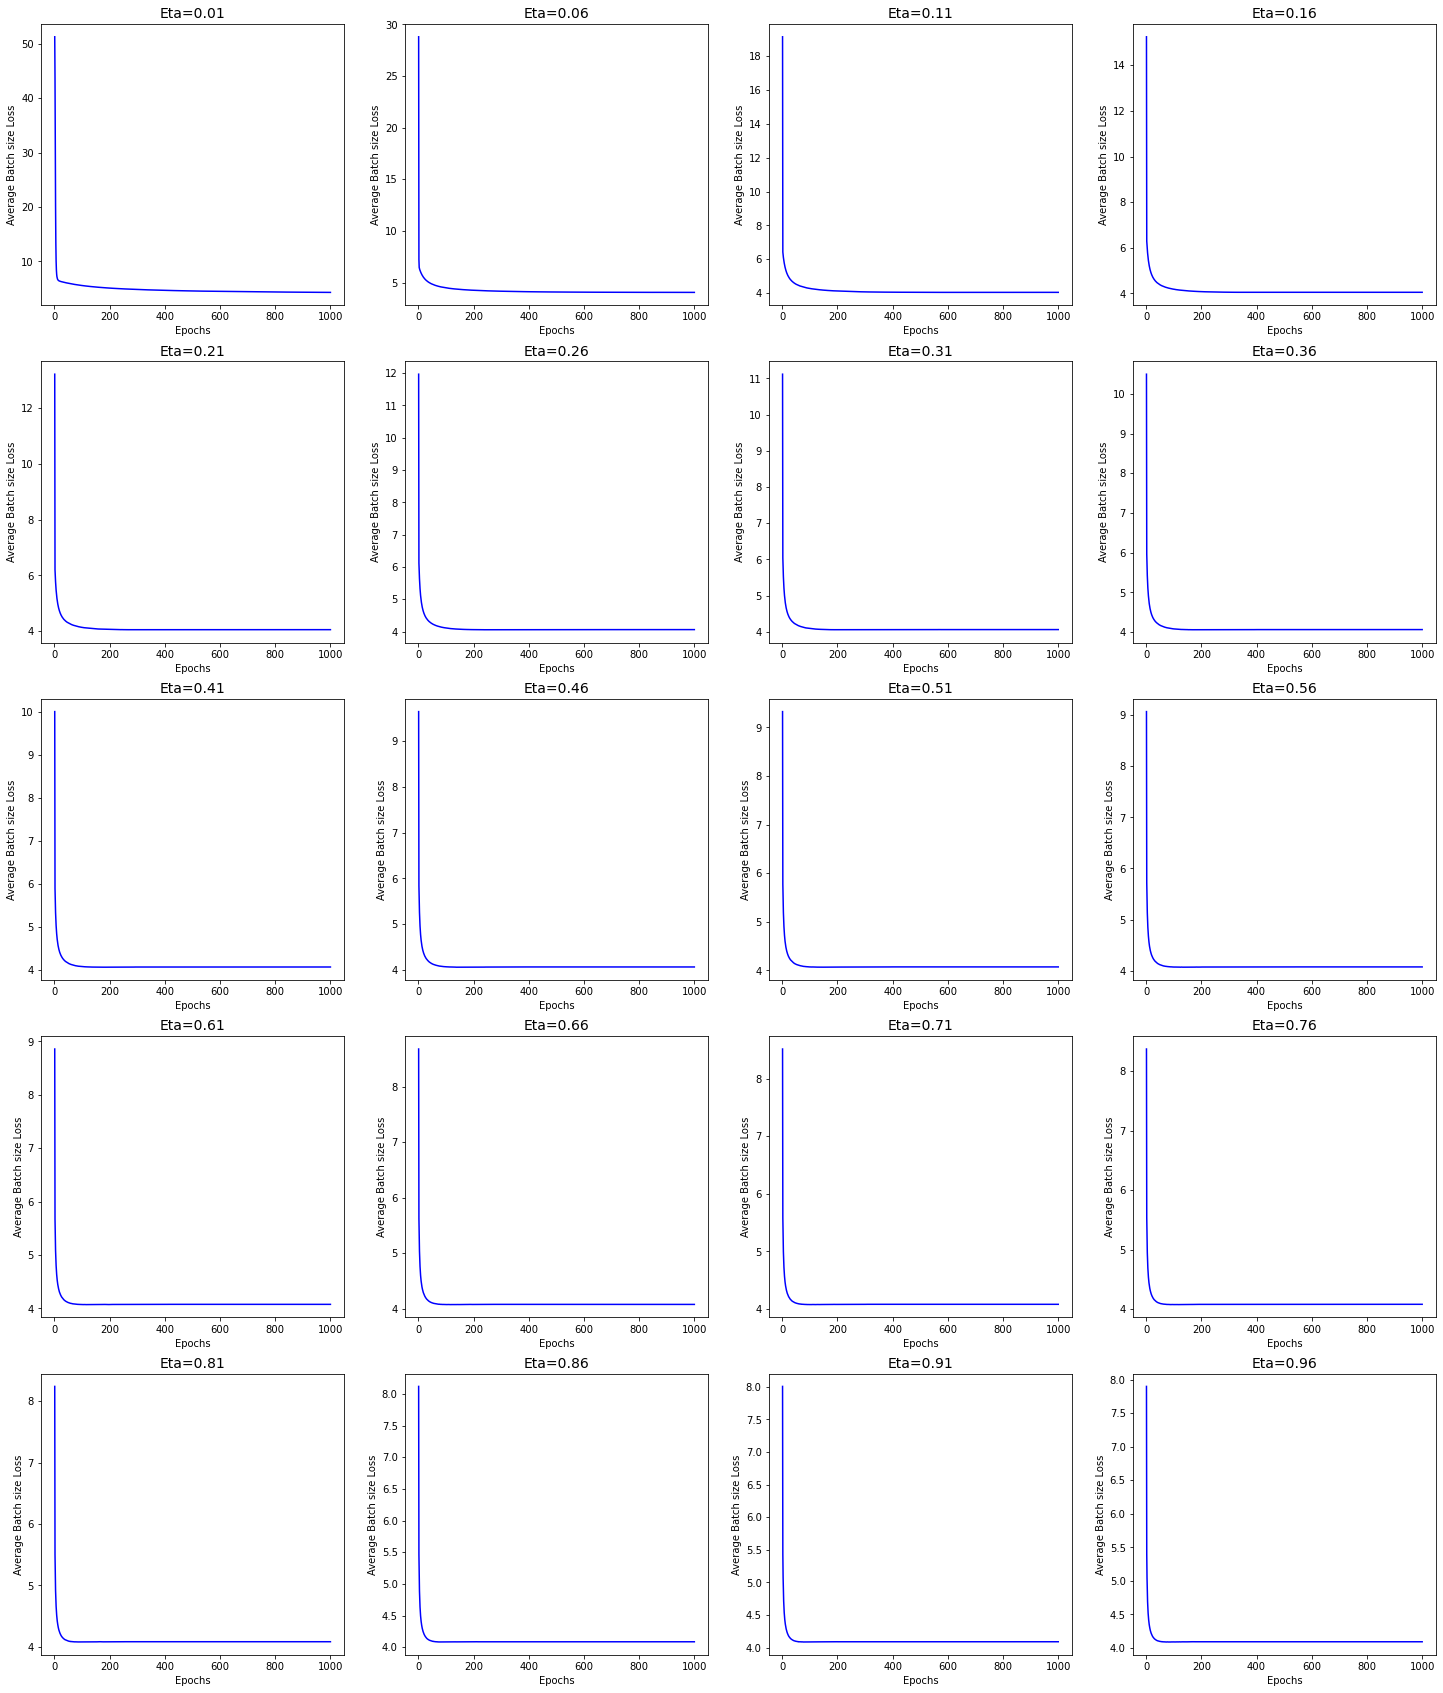

In [118]:
##Plot 1000 epochs by value of loss for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in batch_loss_average_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df = batch_loss_average_all.loc[batch_loss_average_all['learning_rate']==k, ['epochs', 'batch_loss_average']]
    plt.plot(df['epochs'], df['batch_loss_average'], c='blue')
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("Average Batch size Loss", fontsize=10)

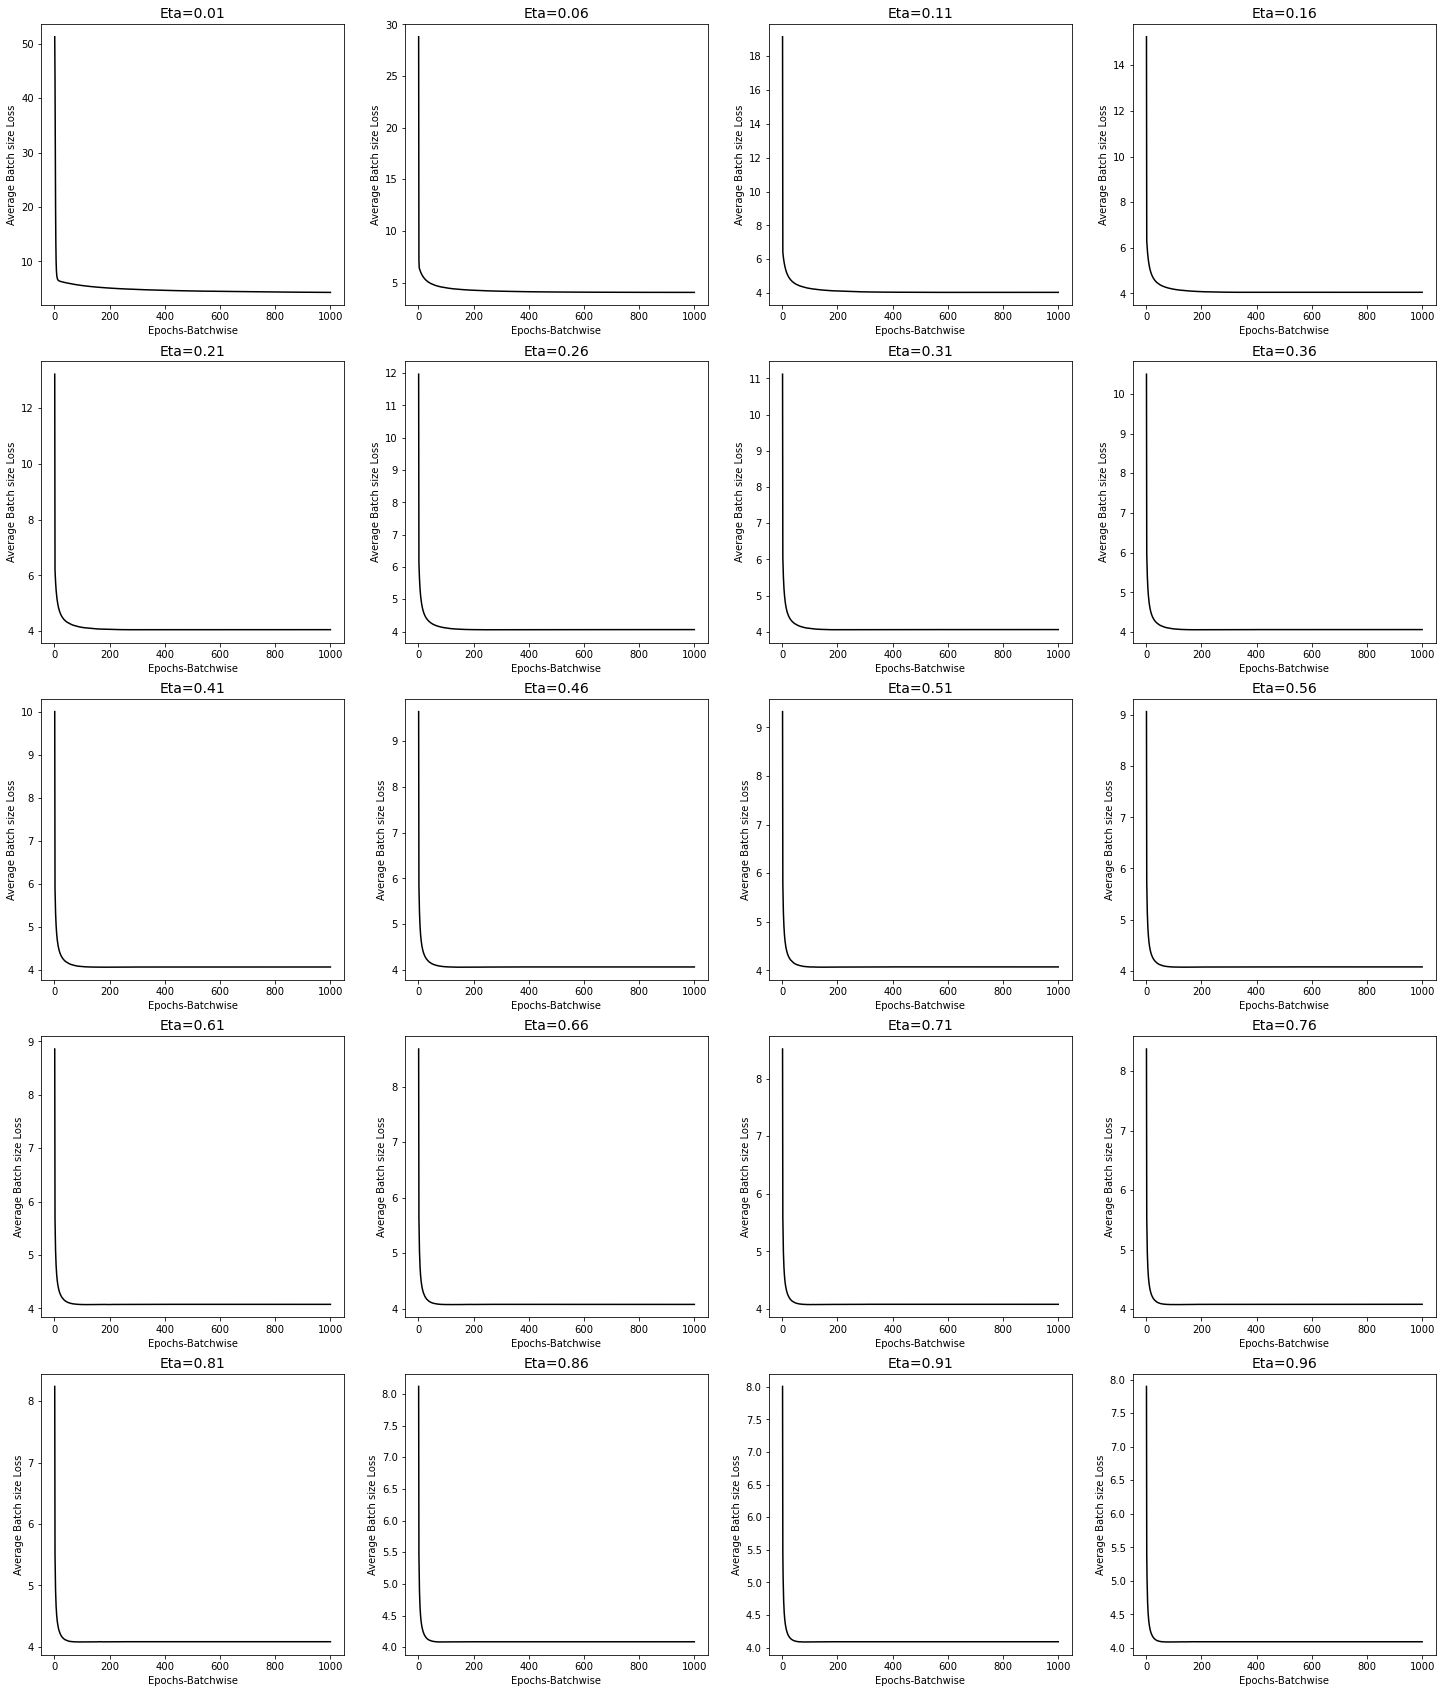

In [119]:
##Plot 1000 epochs by value of loss for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in batch_loss_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df = batch_loss_all.loc[batch_loss_all['learning_rate']==k, ['epochs', 'batch_loss_average']]
    plt.plot(df['epochs'], df['batch_loss_average'], c='black')
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs-Batchwise", fontsize=10)
    plt.ylabel("Average Batch size Loss", fontsize=10)

_Setting ylim to (0,1) for additional visibility_

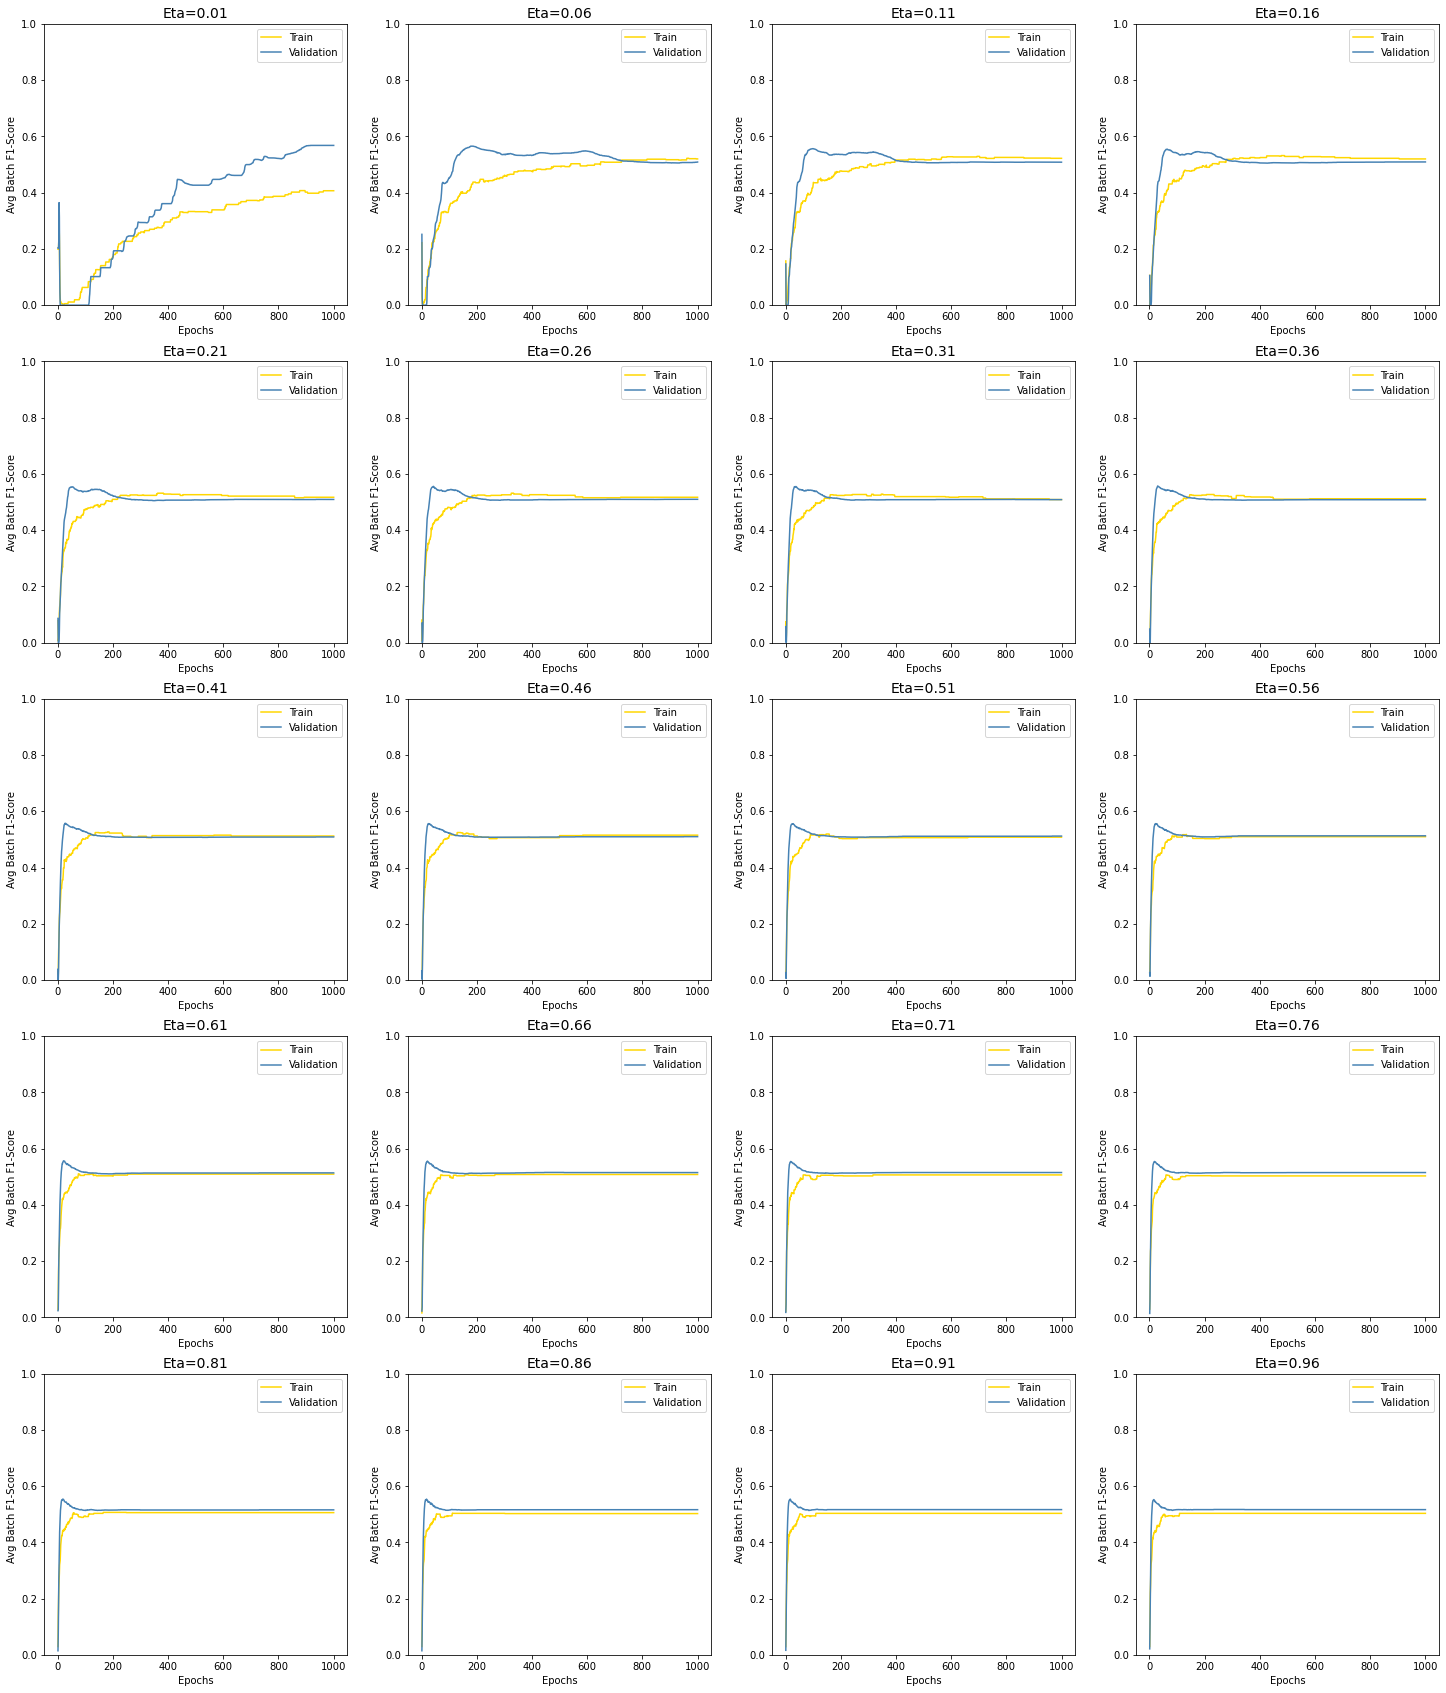

In [120]:
##Plot 1000 epochs by value of F1-score for each value of eta
fig = plt.figure(figsize=(25,30))
i = 1
for k in batch_score_average_all['learning_rate'].unique():
    plt.subplot(5, 4, i)
    i += 1
    df1 = batch_score_average_all.loc[batch_score_average_all['learning_rate']==k, ['epochs', 'batch_f1score_average']]
    df2 = valid_score_average_all.loc[valid_score_average_all['learning_rate']==k, ['epochs', 'valid_f1_score']]
    plt.plot(df1['epochs'], df1['batch_f1score_average'], c='gold', label="Train")
    plt.plot(df2['epochs'], df2['valid_f1_score'], c='steelblue', label="Validation")
    plt.legend(loc="best")
    plt.title("Eta="+str(round(k,3)), fontsize=14)
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("Avg Batch F1-Score", fontsize=10)
    plt.ylim((0,1))

In [121]:
df1 = batch_score_average_all.groupby('learning_rate').agg({'batch_f1score_average':'max'}).reset_index()

df2 = valid_score_average_all.groupby('learning_rate').agg({'valid_f1_score':'max'}).reset_index()

df3 = batch_loss_average_all.groupby('learning_rate').agg({'batch_loss_average':'min'}).reset_index()

df1 = df1.merge(df2)

df1 = df1.merge(df3)

df1.columns = ['learning_rate', 'f1_score_train_avg_max', 'f1_score_validation_avg_max', 'batch_loss_avg_min']

df1['Diff_Score_pct'] = round(((df1['f1_score_train_avg_max'] - df1['f1_score_validation_avg_max'])/df1['f1_score_validation_avg_max'])*100,1)

df1['Change_loss_pct'] = df1['batch_loss_avg_min'].shift(1)

df1['Change_loss_pct'] = round((abs(df1['batch_loss_avg_min'] - df1['Change_loss_pct'])/df1['Change_loss_pct'])*100,1)

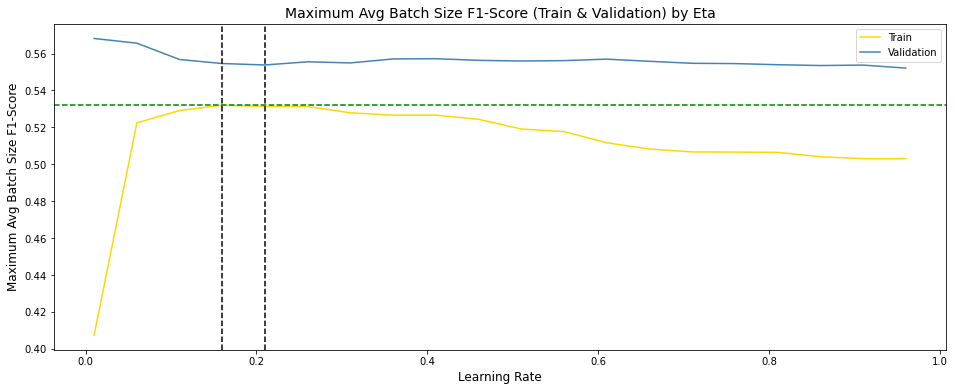

In [122]:
##Plot Maximum F1-Score achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['f1_score_train_avg_max'], c='gold', label="Train")
plt.plot(df1['learning_rate'], df1['f1_score_validation_avg_max'], c='steelblue', label="Validation")
plt.legend(loc="best")
plt.title("Maximum Avg Batch Size F1-Score (Train & Validation) by Eta", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Maximum Avg Batch Size F1-Score", fontsize=12)
plt.axvline(x=0.16, color='k', linestyle='--')
plt.axvline(x=0.21, color='k', linestyle='--')
plt.axhline(y=0.532, color='green', linestyle='--')
plt.show()

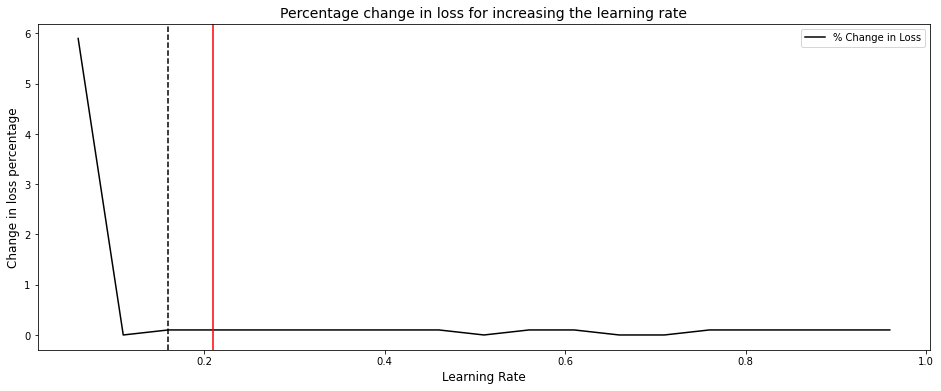

In [123]:
##Plot minimum loss achieved across 1000 epochs for each level of eta in train and validation set
fig = plt.figure(figsize=(16,6))
plt.plot(df1['learning_rate'], df1['Change_loss_pct'], c='black', label="% Change in Loss")
plt.legend(loc="best")
plt.title("Percentage change in loss for increasing the learning rate", fontsize=14)
plt.xlabel("Learning Rate", fontsize=12)
plt.ylabel("Change in loss percentage", fontsize=12)
plt.axvline(x=0.16, color='k', linestyle='--')
plt.axvline(x=0.21, color='red', linestyle='-')
plt.show()

In [124]:
wdata = WeightValues_df_all.copy()

##Process to extract trained weights for best learning rate and epoch
wdata = WeightValues_df_all.copy()

k = wdata['learning_rate'].unique()[3]
# k = wdata['learning_rate'].unique()[10]
df = wdata.loc[wdata['learning_rate']==k, ]
df.reset_index(drop=True, inplace=True)

best_weight = df.iloc[len(df)-1, :-1].values
best_weight = best_weight.reshape(-1,)
best_weight.shape

(16,)

In [125]:
wdata['learning_rate'].unique()[3]

0.16

In [126]:
del wdata

In [127]:
#Call sigmoid function to get predictions for validation set
pred_test = sigmoid_activation(X_test_scaled.dot(best_weight))
##Evaluate validation labels from predicted probability
label_test = [0 if i < 0.5 else 1 for i in pred_test]
##Store f1_score for validation set
score_test = round(f1_score(y_test.values.flatten(), label_test),4)
score_test

0.3585

In [128]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,20,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (pred_test>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)

<ipython-input-128-6955bccdbb05>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall_0 = round(TN/(TN+FP),3)


In [129]:
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

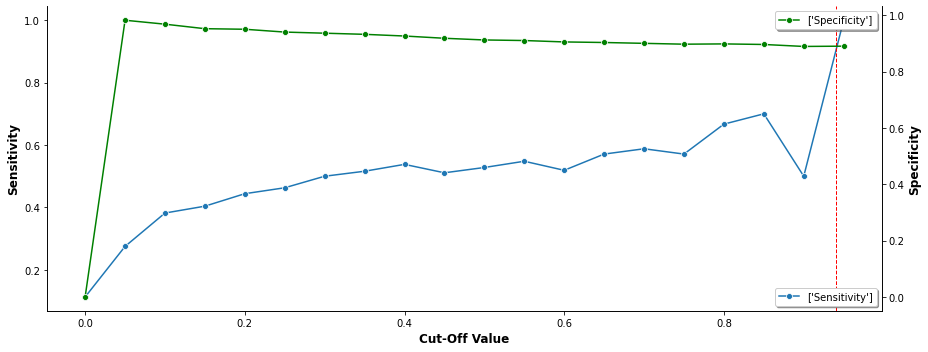

In [130]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.94, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [131]:
##Without thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.50).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(round(TP/(TP+FN),3)*100,2)
test_precision = round(TP/(TP+FP),3)*100
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 52.8 percent and Test Precision is 27.1 percent


In [132]:
##With thresholding
confusion_matrix(y_test.values, (pred_test>0.94).astype(int).reshape(-1,1), labels=[0,1])

array([[548,   0],
       [ 68,   2]], dtype=int64)

In [133]:
##With thresholding
test_matrix = confusion_matrix(y_test.values, (pred_test>0.94).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)*100
test_precision = round(round(TP/(TP+FP),3)*100,2)
print(f"Test Recall for Subscribed=Yes is {test_recall} percent and Test Precision is {test_precision} percent")

Test Recall for Subscribed=Yes is 100.0 percent and Test Precision is 2.9 percent


In [134]:
average_precision_score(y_test.values, pred_test)

0.47602868381676294

In [135]:
del df, df1, df2, df3

In [136]:
# WeightValues_df_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/WeightValues_df_all.csv",
#                            index=True)

# batch_loss_average_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/batch_loss_average_all.csv",
#                               index=True)

# batch_loss_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/batch_loss_all.csv",
#                       index=True)

# batch_score_average_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/batch_score_average_all.csv",
#                                index=True)

# batch_score_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/batch_score_all.csv",
#                        index=True)

# valid_score_average_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/valid_score_average_all.csv",
#                                index=True)

# valid_score_all.to_csv("C:/Users/sinaii/Documents/Arimitra_Maiti/IIM-A Docs/Non-Linear OPB/BGD/valid_score_all.csv",
#                        index=True)

In [137]:
del WeightValues_df_all, batch_loss_average_all, batch_loss_all, batch_score_average_all, batch_score_all, valid_score_average_all, valid_score_all

del a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19

del b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19

del c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19

del d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19

del e0, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19

del f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f19

del g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19

**Logistic Reression- newton-cg & lbfgs**

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [140]:
##Invoke logistic regression classifier with weights
classifier_logit = LogisticRegression(
    solver='newton-cg',
    penalty='l2',
    random_state=1,
    n_jobs=-1,
    class_weight={0:1, 1:3})

##Fit to train data
classifier_logit.fit(X_train_scaled, y_train)

##Predict train set
train_predictions = classifier_logit.predict_proba(X_train_scaled)
##Predict validation set
validation_predictions = classifier_logit.predict_proba(X_valid_scaled)
##Predict test set
test_predictions = classifier_logit.predict_proba(X_test_scaled)

C:\Users\sinaii\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


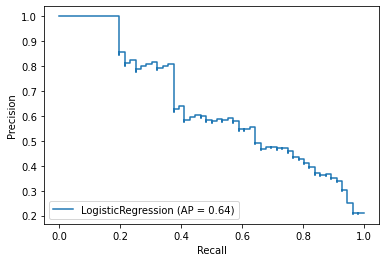

In [141]:
prcurve_logit = plot_precision_recall_curve(classifier_logit, X_valid_scaled, y_valid)

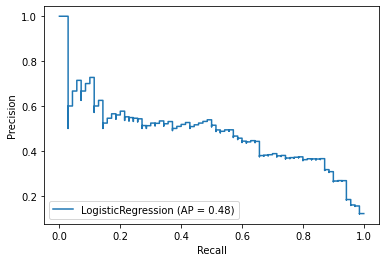

In [142]:
prcurve_logit = plot_precision_recall_curve(classifier_logit, X_test_scaled, y_test)

In [143]:
average_precision_score(y_test, test_predictions[:, 1])

0.47704246982102794

In [144]:
##Evaluate validation labels from predicted probability
label_test = [0 if i < 0.5 else 1 for i in test_predictions[:, 1]]
##Store f1_score for validation set
score_test = round(f1_score(y_test.values.flatten(), label_test),4)
score_test

0.5161

In [145]:
##Invoke logistic regression classifier with weights
classifier_logit = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    random_state=1,
    n_jobs=-1,
    class_weight={0:1, 1:3})

##Fit to train data
classifier_logit.fit(X_train_scaled, y_train)

##Predict train set
train_predictions = classifier_logit.predict_proba(X_train_scaled)
##Predict validation set
validation_predictions = classifier_logit.predict_proba(X_valid_scaled)
##Predict test set
test_predictions = classifier_logit.predict_proba(X_test_scaled)

C:\Users\sinaii\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


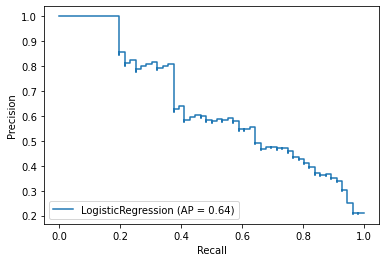

In [146]:
prcurve_logit = plot_precision_recall_curve(classifier_logit, X_valid_scaled, y_valid)

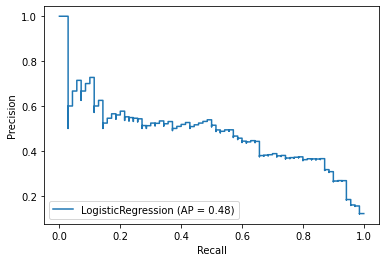

In [147]:
prcurve_logit = plot_precision_recall_curve(classifier_logit, X_test_scaled, y_test)

In [148]:
average_precision_score(y_test, test_predictions[:, 1])

0.47704246982102794

**Comparison**

In [149]:
method = ["GD(squared-loss)", "GD(cross-entropy)", "BGD(squared-loss)", "newton-cg", "lbfgs"]
lr = [0.81, 0.31, 0.16, np.nan, np.nan]
f1_score = [0.3585, 0.2062, 0.3585, 0.3738, 0.5161, 0.5161]
avgerage_precision_score = [0.50, 0.36, 0.48, 0.48, 0.48, 0.48]

In [150]:
plot_data = pd.DataFrame([method, lr, f1_score, avgerage_precision_score]).transpose()
plot_data.columns = ["method", "lr", "f1_score", "avgerage_precision_score"]

plot_data["avgerage_precision_score"] = plot_data["avgerage_precision_score"].astype(float)
plot_data["f1_score"] = plot_data["f1_score"].astype(float)

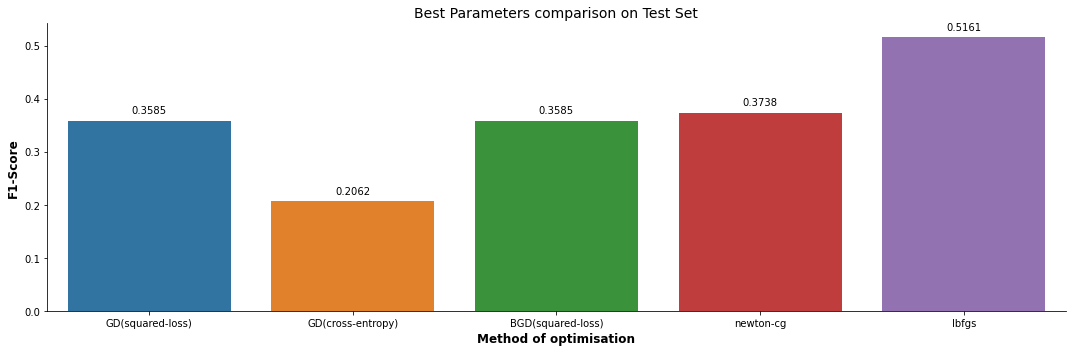

In [151]:
fig, axes = plt.subplots(figsize=(15,5))
fig.subplots_adjust(top=0.7)
splot = sns.barplot(x='method', y="f1_score", data=plot_data, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Best Parameters comparison on Test Set', fontsize=14)
axes.set_xlabel('Method of optimisation', fontsize=12, weight='bold')
axes.set_ylabel('F1-Score', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.4f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

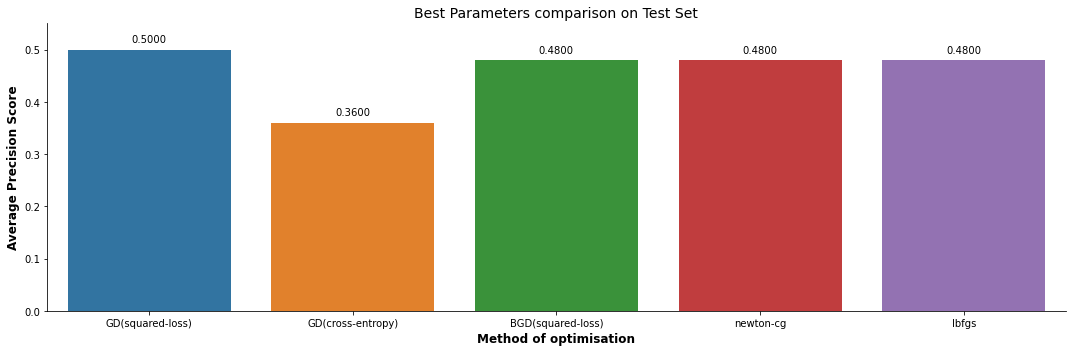

In [152]:
fig, axes = plt.subplots(figsize=(15,5))
fig.subplots_adjust(top=0.7)
splot = sns.barplot(x='method', y="avgerage_precision_score", data=plot_data, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Best Parameters comparison on Test Set', fontsize=14)
axes.set_xlabel('Method of optimisation', fontsize=12, weight='bold')
axes.set_ylabel('Average Precision Score', fontsize=12, weight='bold')
axes.set_ylim(0, 0.55)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.4f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [153]:
end = datetime.now()
print("now =", end)

now = 2021-01-26 19:16:59.949559


**Thank You**